In [51]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [52]:
df=pd.read_csv('file:///C:/Users/Md%20Asif%20Ikbal/Downloads/covid_asia_weekly_trend.csv')
df.head()

,Country/Other,Cases in the last 7 days,Cases in the preceding 7 days,Weekly Case % Change,Cases in the last 7 days/1M pop,Deaths in the last 7 days,Deaths in the preceding 7 days,Weekly Death % Change,Deaths in the last 7 days/1M pop,Population
0,Afghanistan,288,339,-15,7,3,8,-63,0,40164434
1,Armenia,3640,4965,-27,1225,211,249,-15,71,2971068
2,Azerbaijan,11615,12763,-9,1131,170,184,-8,17,10268225
3,Bahrain,246,182,35,138,0,1,-100,0,1784842
4,Bangladesh,1648,1688,-2,10,23,30,-23,0,167006043


In [53]:
df.shape

(48, 10)

In [54]:
df.isnull().sum()

Country/Other                       0
Cases in the last 7 days            0
Cases in the preceding 7 days       0
Weekly Case % Change                0
Cases in the last 7 days/1M pop     0
Deaths in the last 7 days           0
Deaths in the preceding 7 days      0
Weekly Death % Change               0
Deaths in the last 7 days/1M pop    0
Population                          0
dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Country/Other                     48 non-null     object
 1   Cases in the last 7 days          48 non-null     int64 
 2   Cases in the preceding 7 days     48 non-null     int64 
 3   Weekly Case % Change              48 non-null     int64 
 4   Cases in the last 7 days/1M pop   48 non-null     int64 
 5   Deaths in the last 7 days         48 non-null     int64 
 6   Deaths in the preceding 7 days    48 non-null     int64 
 7   Weekly Death % Change             48 non-null     int64 
 8   Deaths in the last 7 days/1M pop  48 non-null     int64 
 9   Population                        48 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 3.9+ KB


In [56]:
df.dtypes

Country/Other                       object
Cases in the last 7 days             int64
Cases in the preceding 7 days        int64
Weekly Case % Change                 int64
Cases in the last 7 days/1M pop      int64
Deaths in the last 7 days            int64
Deaths in the preceding 7 days       int64
Weekly Death % Change                int64
Deaths in the last 7 days/1M pop     int64
Population                           int64
dtype: object

In [57]:
df.describe()

,Cases in the last 7 days,Cases in the preceding 7 days,Weekly Case % Change,Cases in the last 7 days/1M pop,Deaths in the last 7 days,Deaths in the preceding 7 days,Weekly Death % Change,Deaths in the last 7 days/1M pop,Population
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,4.800000e+01
mean,12680.687500,12720.083333,-8.895833,625.041667,204.583333,213.083333,-14.916667,7.583333,9.717682e+07
std,29438.043546,28392.214578,26.296379,1146.419940,473.239889,477.633610,23.984776,18.630601,2.854619e+08
min,0.000000,4.000000,-100.000000,0.000000,0.000000,0.000000,-100.000000,0.000000,4.433940e+05
25%,277.500000,331.000000,-18.250000,9.750000,2.750000,2.500000,-20.000000,0.000000,5.284405e+06
50%,2086.500000,2222.500000,-10.000000,90.500000,27.000000,29.500000,-5.500000,2.000000,1.757273e+07
75%,9265.500000,8235.000000,0.000000,964.500000,165.500000,148.500000,0.000000,8.000000,5.222989e+07
max,171008.000000,167461.000000,51.000000,6651.000000,2663.000000,2431.000000,3.000000,110.000000,1.447176e+09


In [58]:
df.corr().describe().T

,count,mean,std,min,25%,50%,75%,max
Cases in the last 7 days,9.0,0.471150,0.370940,0.082158,0.158322,0.303997,0.707316,1.0
Cases in the preceding 7 days,9.0,0.478981,0.376935,0.057028,0.189026,0.300294,0.736268,1.0
Weekly Case % Change,9.0,0.103497,0.352902,-0.219017,-0.043032,0.016671,0.082158,1.0
Cases in the last 7 days/1M pop,9.0,0.312496,0.361606,-0.149948,0.122532,0.168444,0.303997,1.0
Deaths in the last 7 days,9.0,0.476271,0.398684,-0.043032,0.122532,0.517698,0.736268,1.0
Deaths in the preceding 7 days,9.0,0.450959,0.405411,-0.091552,0.113397,0.465221,0.700771,1.0
Weekly Death % Change,9.0,0.183922,0.328118,-0.219017,0.081405,0.130511,0.158322,1.0
Deaths in the last 7 days/1M pop,9.0,0.271864,0.372947,-0.101703,0.081405,0.168094,0.189026,1.0
Population,9.0,0.247165,0.361450,-0.149948,0.016671,0.156683,0.465221,1.0


In [59]:
df.mean()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Cases in the last 7 days            1.268069e+04
Cases in the preceding 7 days       1.272008e+04
Weekly Case % Change               -8.895833e+00
Cases in the last 7 days/1M pop     6.250417e+02
Deaths in the last 7 days           2.045833e+02
Deaths in the preceding 7 days      2.130833e+02
Weekly Death % Change              -1.491667e+01
Deaths in the last 7 days/1M pop    7.583333e+00
Population                          9.717682e+07
dtype: float64

In [60]:
df.min()

Country/Other                       Afghanistan
Cases in the last 7 days                      0
Cases in the preceding 7 days                 4
Weekly Case % Change                       -100
Cases in the last 7 days/1M pop               0
Deaths in the last 7 days                     0
Deaths in the preceding 7 days                0
Weekly Death % Change                      -100
Deaths in the last 7 days/1M pop              0
Population                               443394
dtype: object

In [61]:
df.max()

Country/Other                            Yemen
Cases in the last 7 days                171008
Cases in the preceding 7 days           167461
Weekly Case % Change                        51
Cases in the last 7 days/1M pop           6651
Deaths in the last 7 days                 2663
Deaths in the preceding 7 days            2431
Weekly Death % Change                        3
Deaths in the last 7 days/1M pop           110
Population                          1447175543
dtype: object

In [62]:
df.skew()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Cases in the last 7 days            4.018445
Cases in the preceding 7 days       3.995325
Weekly Case % Change               -0.633137
Cases in the last 7 days/1M pop     3.551008
Deaths in the last 7 days           3.744532
Deaths in the preceding 7 days      3.306361
Weekly Death % Change              -2.249845
Deaths in the last 7 days/1M pop    4.542019
Population                          4.441566
dtype: float64

In [63]:
for i  in df.columns:
    print(f'unique values in column "{i}" is\n {df[i].value_counts()}')
    print('-------------------------------------------------')

unique values in column "Country/Other" is
 Afghanistan     1
Armenia         1
Mongolia        1
Myanmar         1
Nepal           1
Oman            1
Pakistan        1
Palestine       1
Philippines     1
Qatar           1
S. Korea        1
Saudi Arabia    1
Singapore       1
Sri Lanka       1
Syria           1
Taiwan          1
Tajikistan      1
Thailand        1
Timor-Leste     1
Turkey          1
UAE             1
Uzbekistan      1
Vietnam         1
Maldives        1
Malaysia        1
Lebanon         1
Hong Kong       1
Azerbaijan      1
Bahrain         1
Bangladesh      1
Bhutan          1
Brunei          1
Cambodia        1
China           1
Cyprus          1
Georgia         1
India           1
Laos            1
Indonesia       1
Iran            1
Iraq            1
Israel          1
Japan           1
Jordan          1
Kazakhstan      1
Kuwait          1
Kyrgyzstan      1
Yemen           1
Name: Country/Other, dtype: int64
-------------------------------------------------
unique v

In [64]:
df.head(2)

,Country/Other,Cases in the last 7 days,Cases in the preceding 7 days,Weekly Case % Change,Cases in the last 7 days/1M pop,Deaths in the last 7 days,Deaths in the preceding 7 days,Weekly Death % Change,Deaths in the last 7 days/1M pop,Population
0,Afghanistan,288,339,-15,7,3,8,-63,0,40164434
1,Armenia,3640,4965,-27,1225,211,249,-15,71,2971068


In [65]:
object_col=[]
num_col=[]
for i in df.columns:
    if df[i].dtype=='object':
        object_col.append(i)
    else:
        num_col.append(i)

In [66]:
object_col

['Country/Other']

In [67]:
num_col

['Cases in the last 7 days',
 'Cases in the preceding 7 days',
 'Weekly Case % Change',
 'Cases in the last 7 days/1M pop',
 'Deaths in the last 7 days',
 'Deaths in the preceding 7 days',
 'Weekly Death % Change',
 'Deaths in the last 7 days/1M pop',
 'Population']

In [76]:
df.columns

Index(['Country/Other', 'Cases in the last 7 days',
       'Cases in the preceding 7 days', 'Weekly Case % Change',
       'Cases in the last 7 days/1M pop', 'Deaths in the last 7 days',
       'Deaths in the preceding 7 days', 'Weekly Death % Change',
       'Deaths in the last 7 days/1M pop', 'Population'],
      dtype='object')

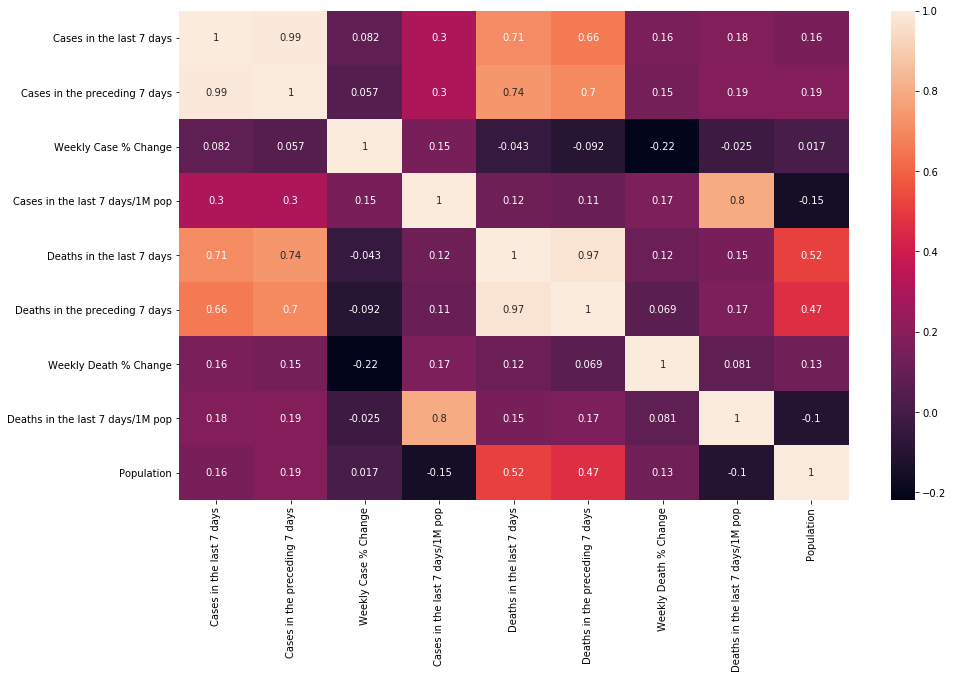

In [74]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

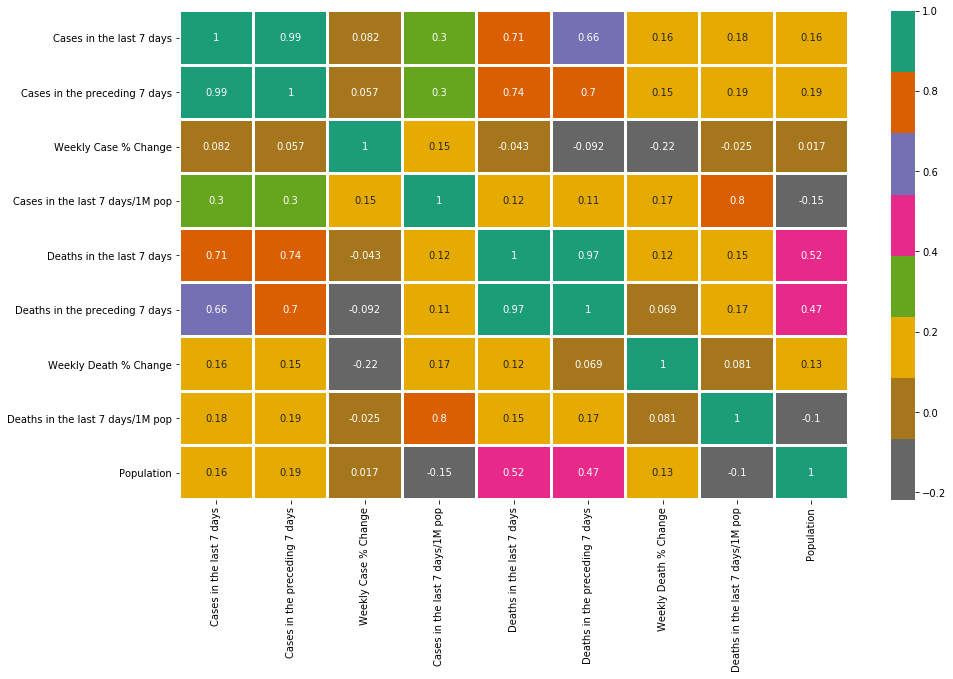

In [75]:
plt.figure(figsize=(15,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

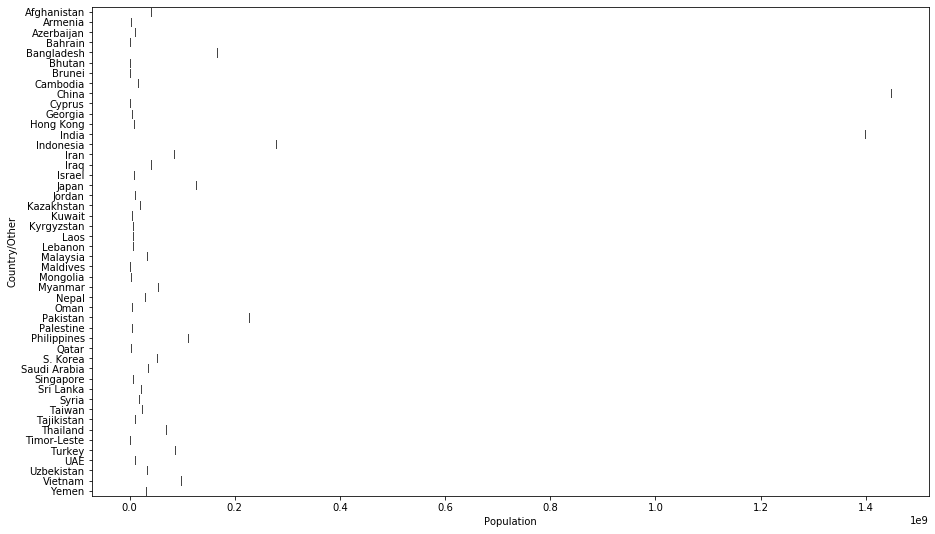

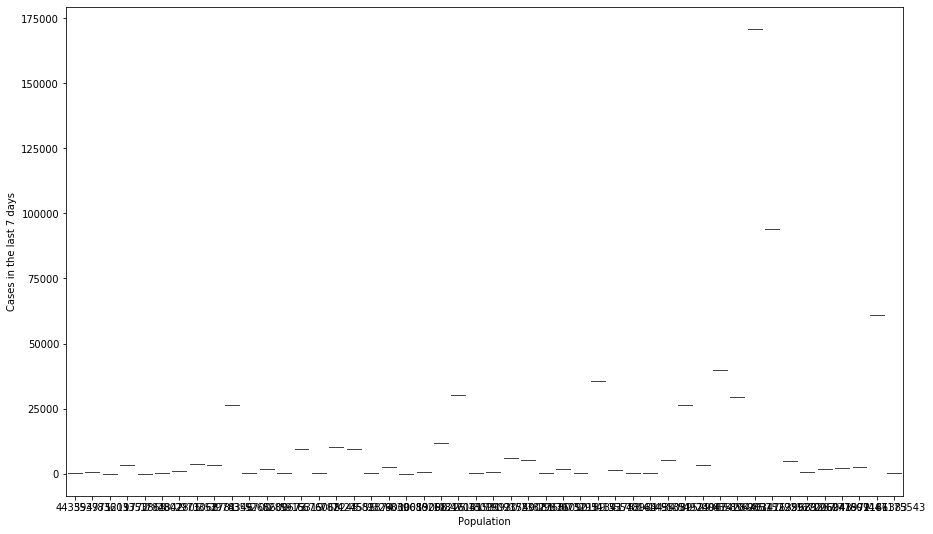

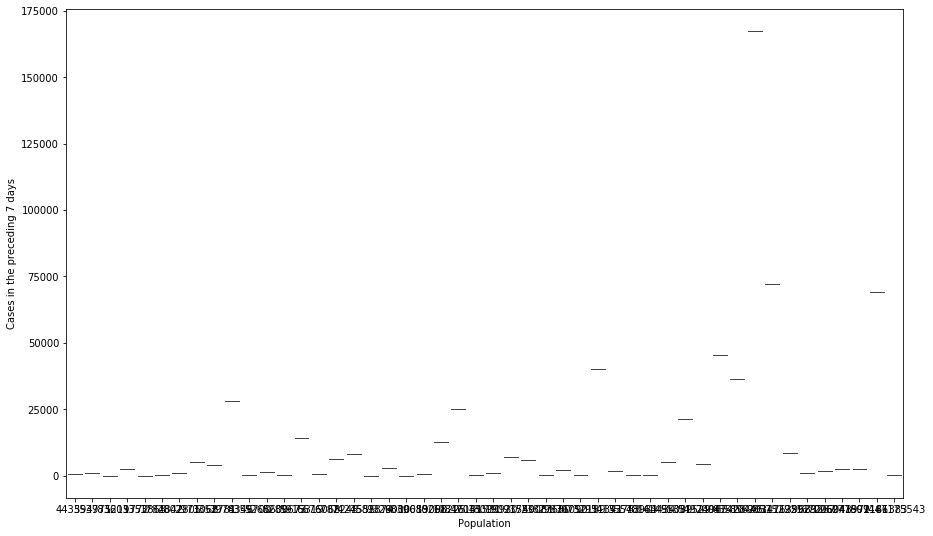

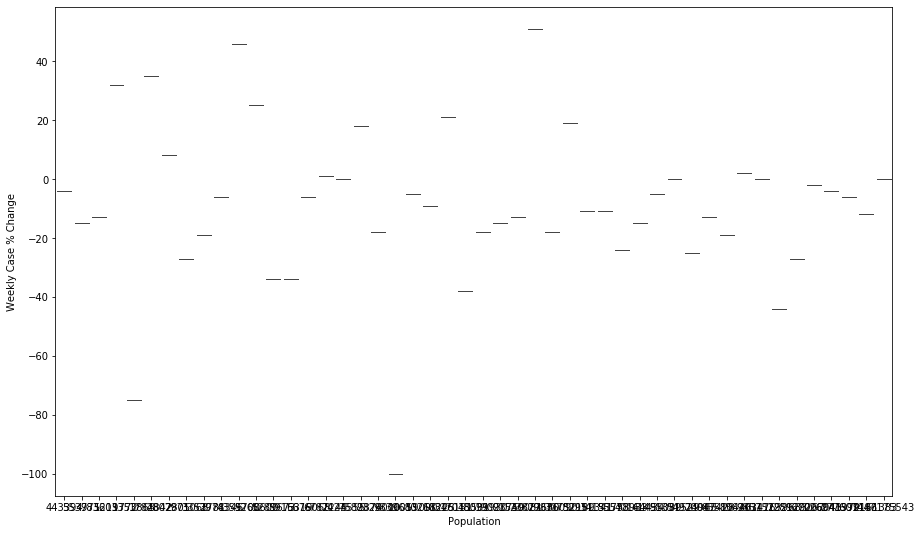

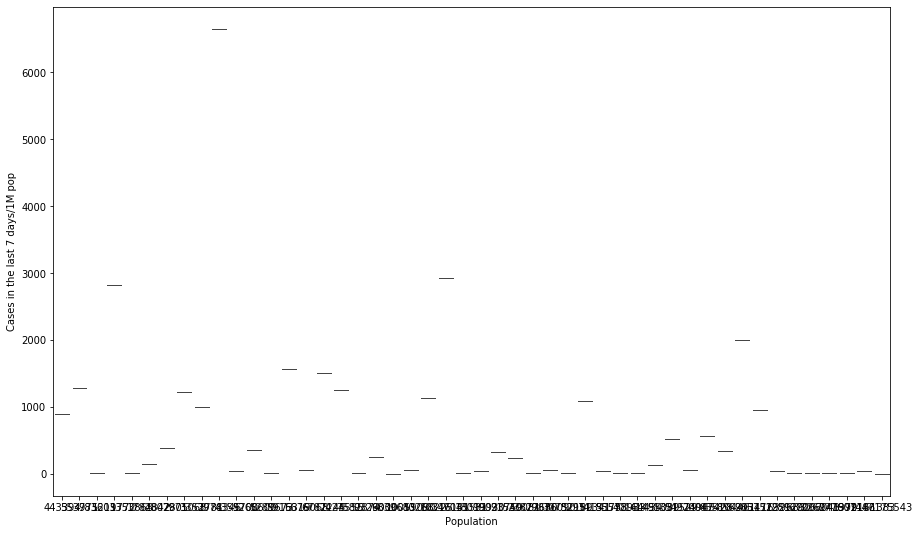

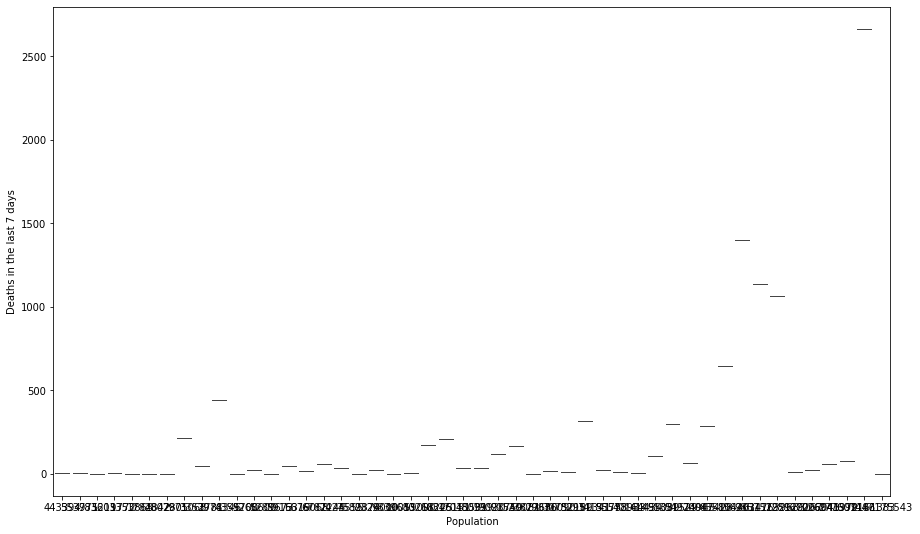

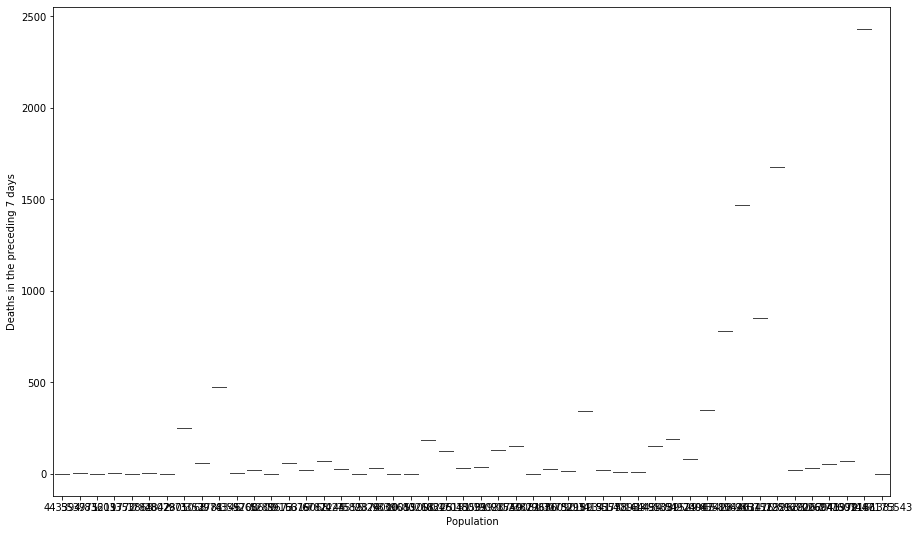

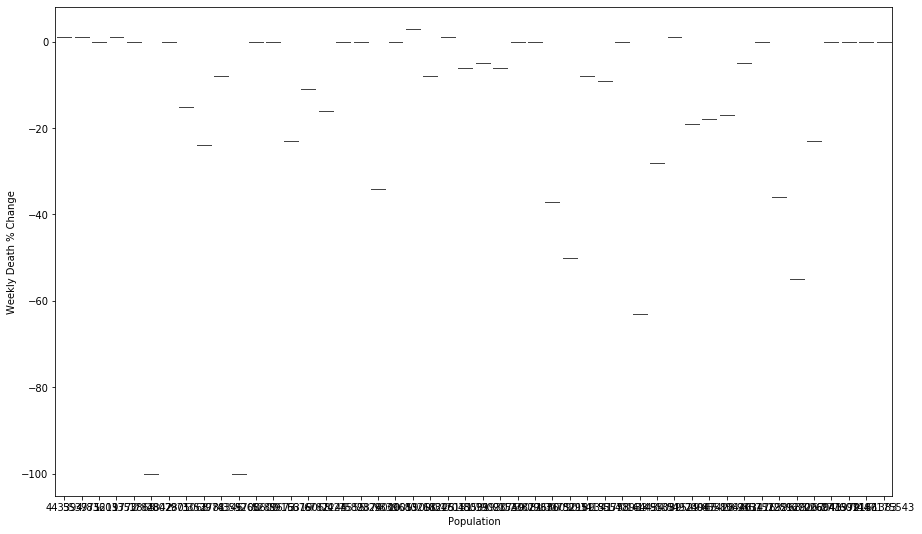

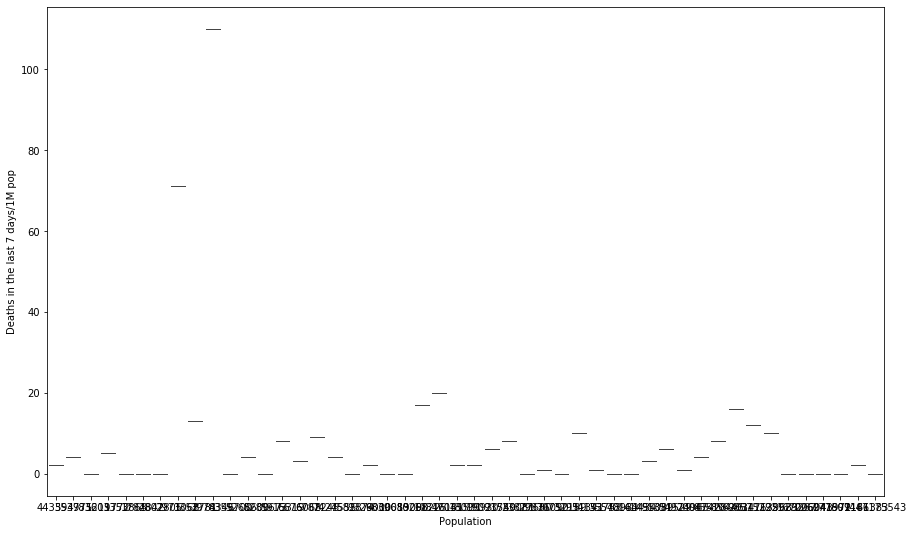

In [80]:
for i in ['Country/Other', 'Cases in the last 7 days',
       'Cases in the preceding 7 days', 'Weekly Case % Change',
       'Cases in the last 7 days/1M pop', 'Deaths in the last 7 days',
       'Deaths in the preceding 7 days', 'Weekly Death % Change',
       'Deaths in the last 7 days/1M pop']:
    plt.figure(figsize=(15,9))
    sns.boxplot(x=df.Population,y=df[i],data=df,linewidth=1)
    plt.show()

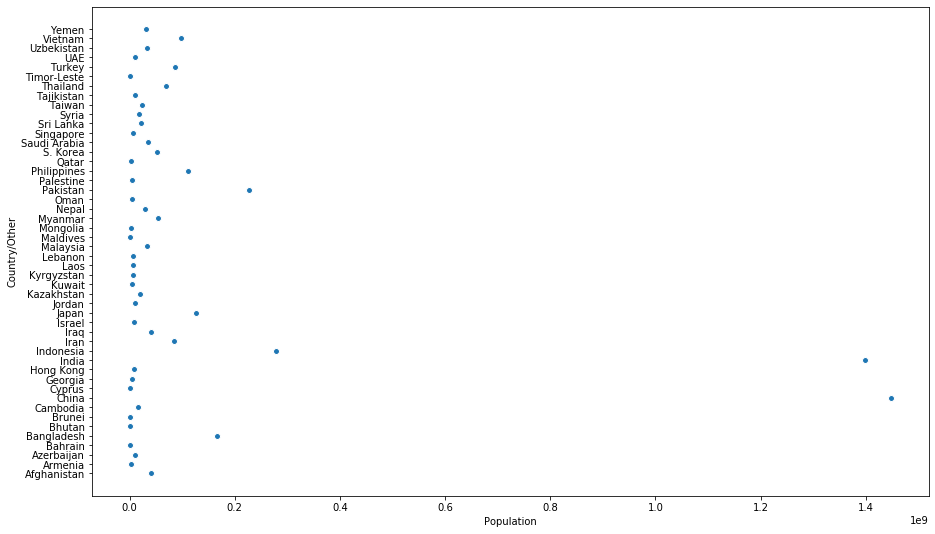

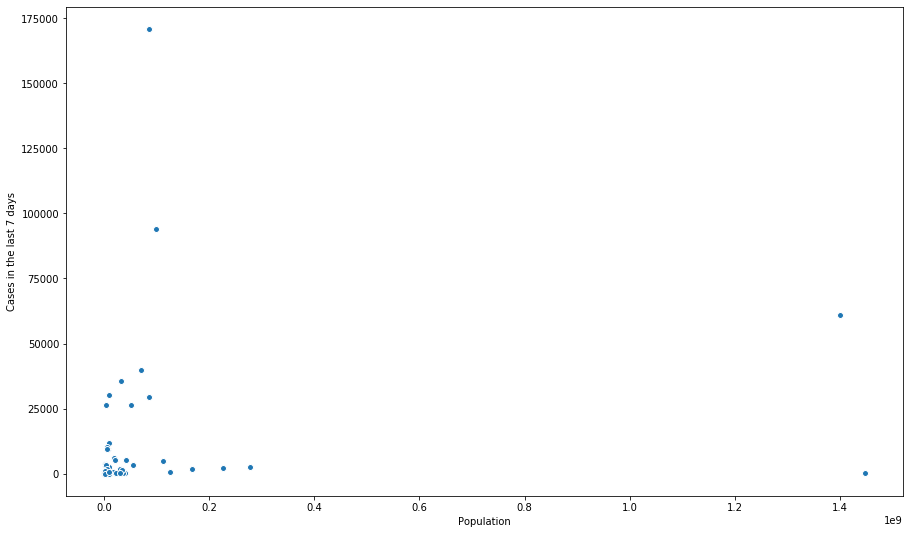

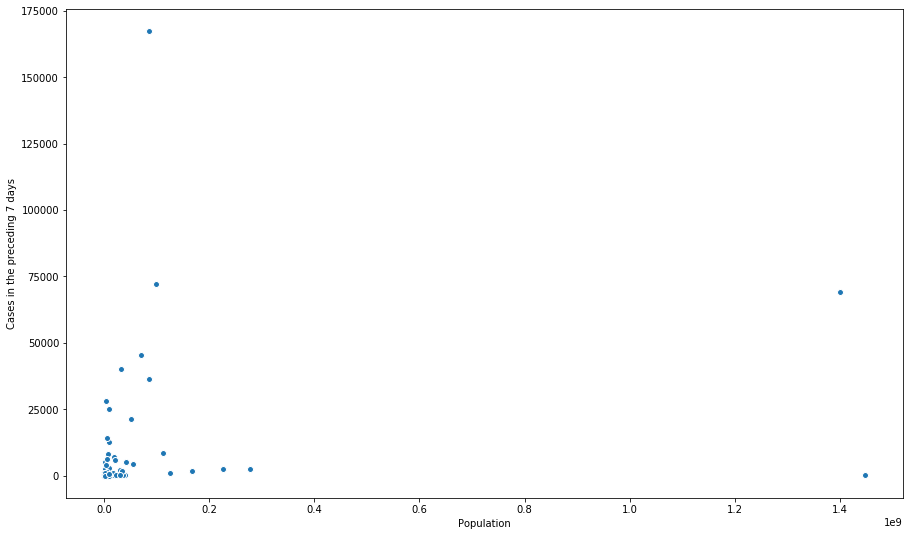

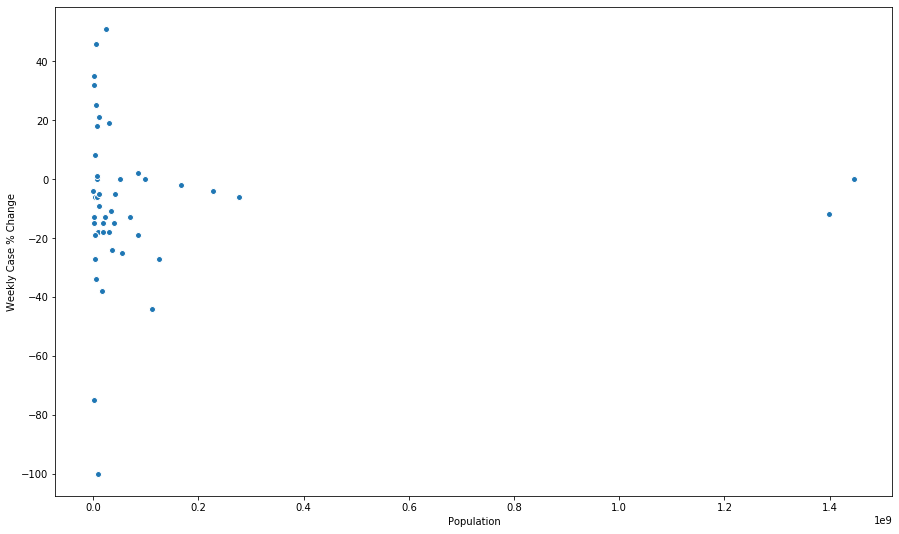

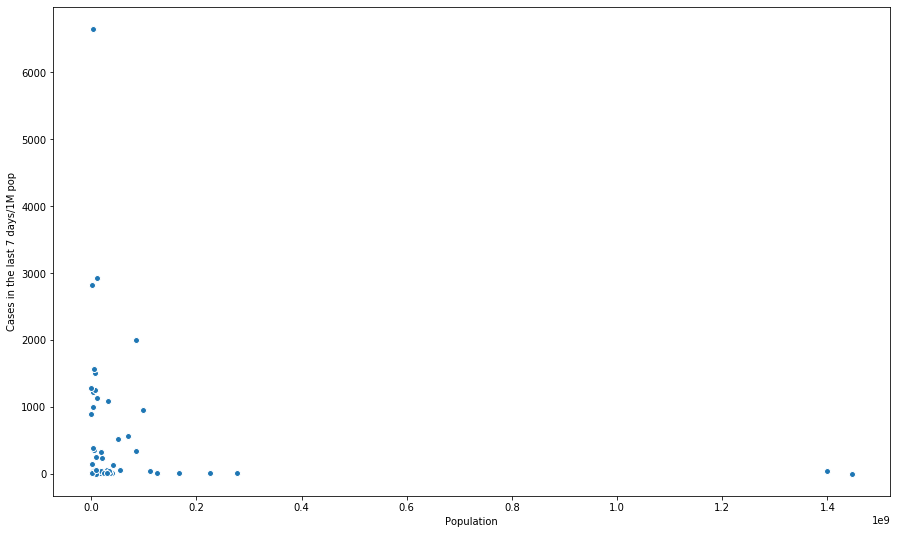

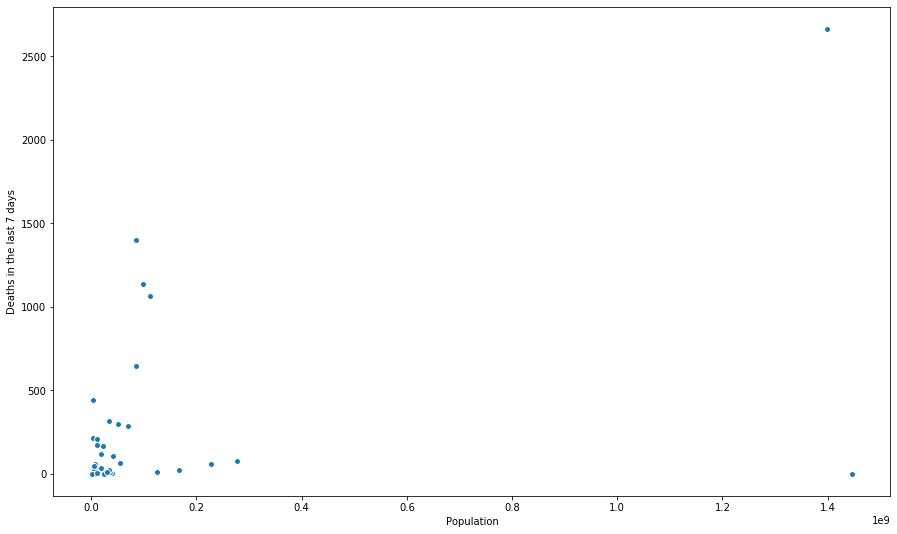

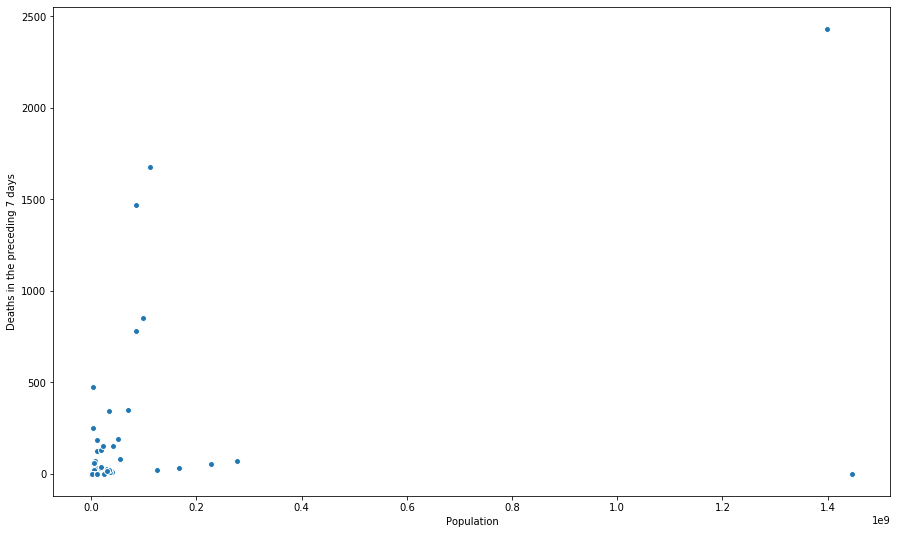

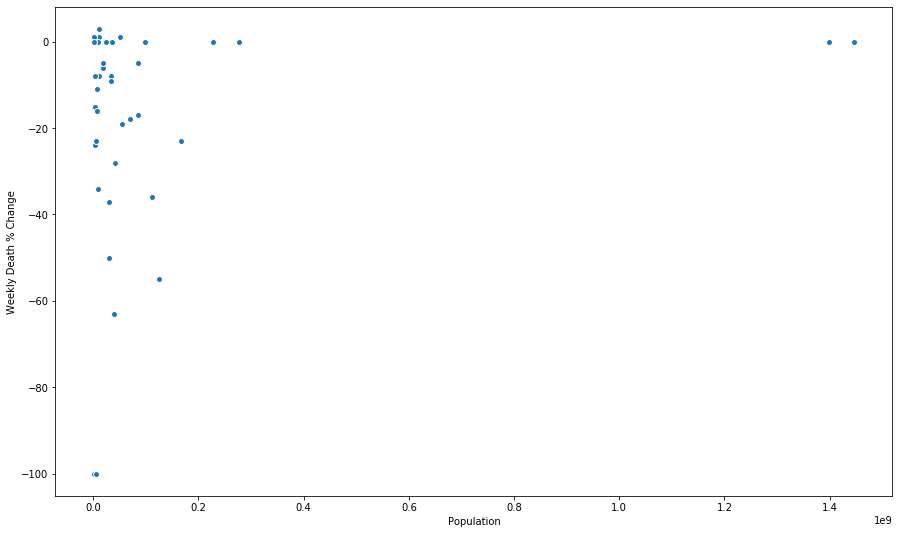

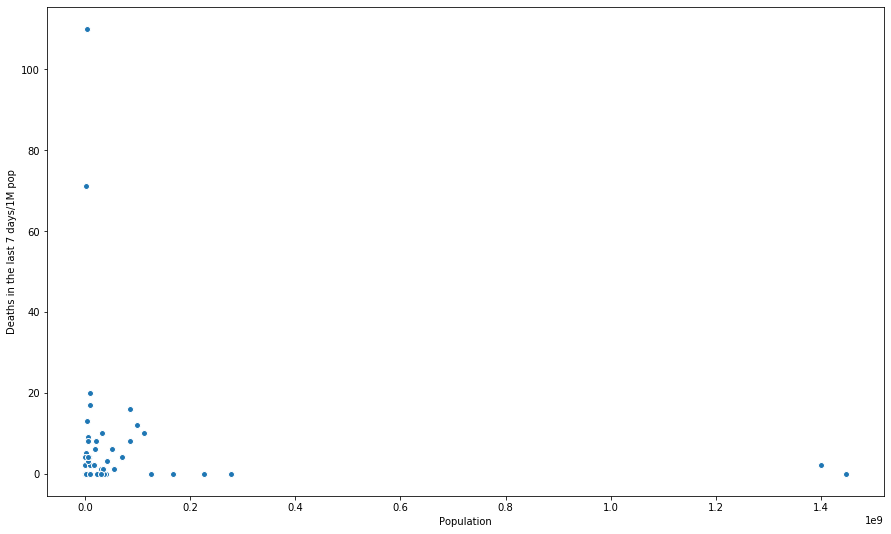

In [81]:
for i in ['Country/Other', 'Cases in the last 7 days',
       'Cases in the preceding 7 days', 'Weekly Case % Change',
       'Cases in the last 7 days/1M pop', 'Deaths in the last 7 days',
       'Deaths in the preceding 7 days', 'Weekly Death % Change',
       'Deaths in the last 7 days/1M pop']:
    plt.figure(figsize=(15,9))
    sns.scatterplot(x=df.Population,y=df[i],data=df,linewidth=1)
    plt.show()

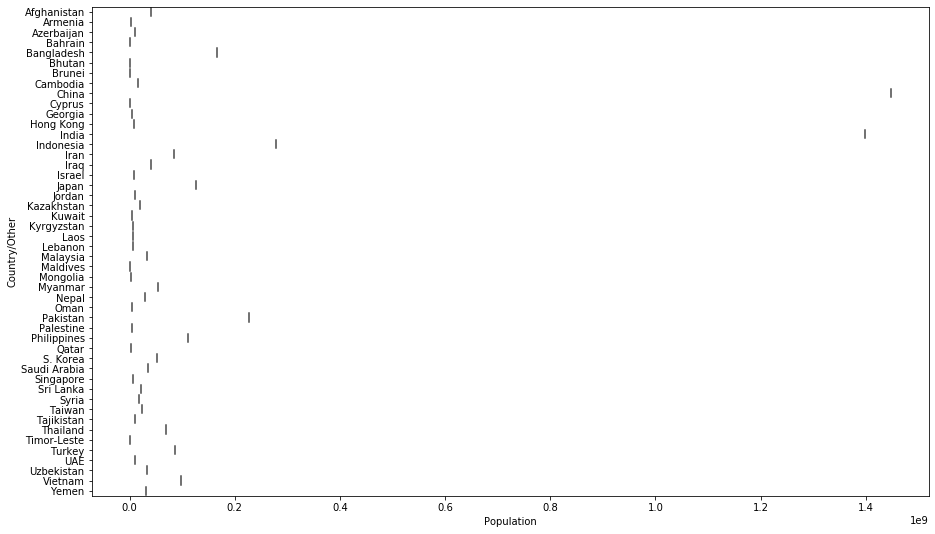

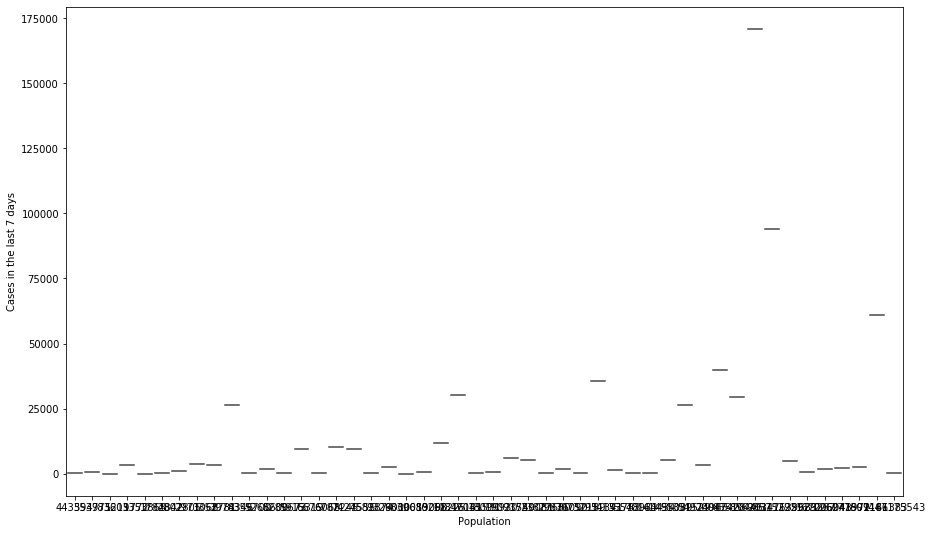

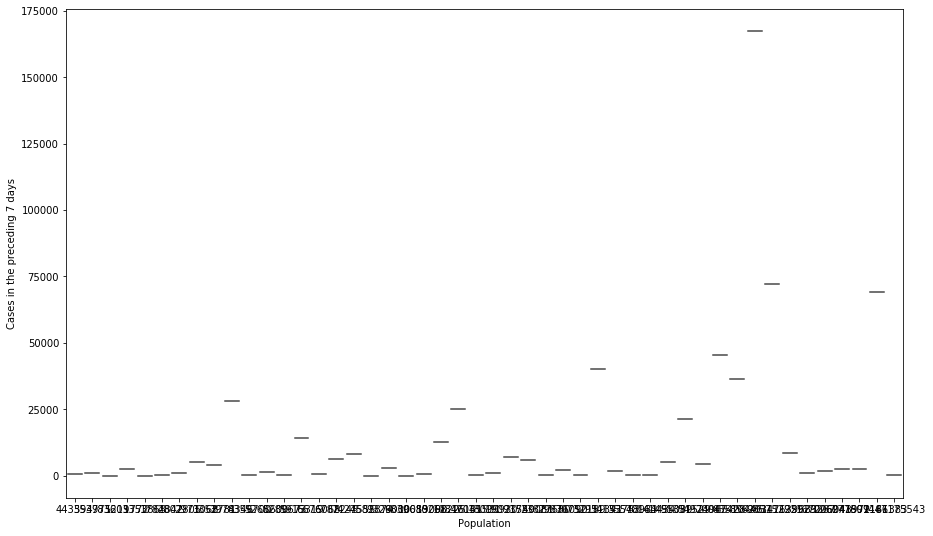

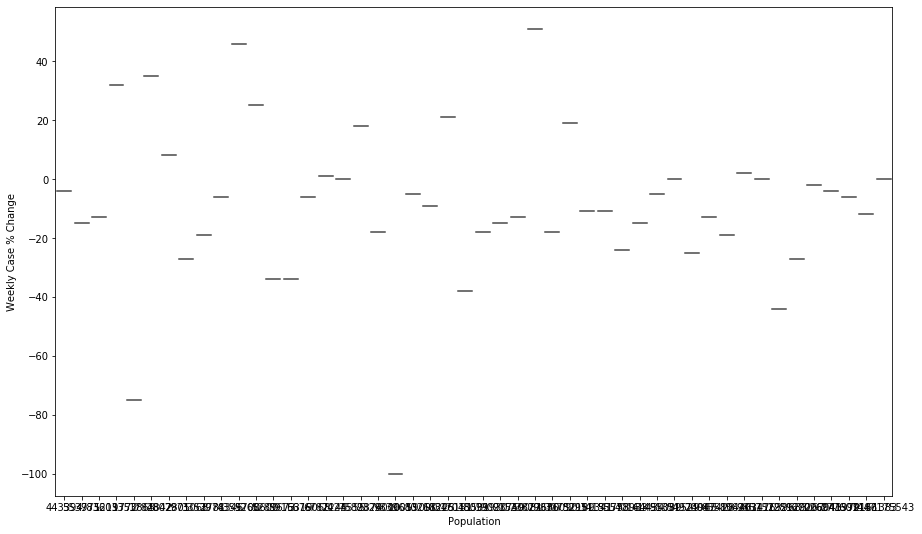

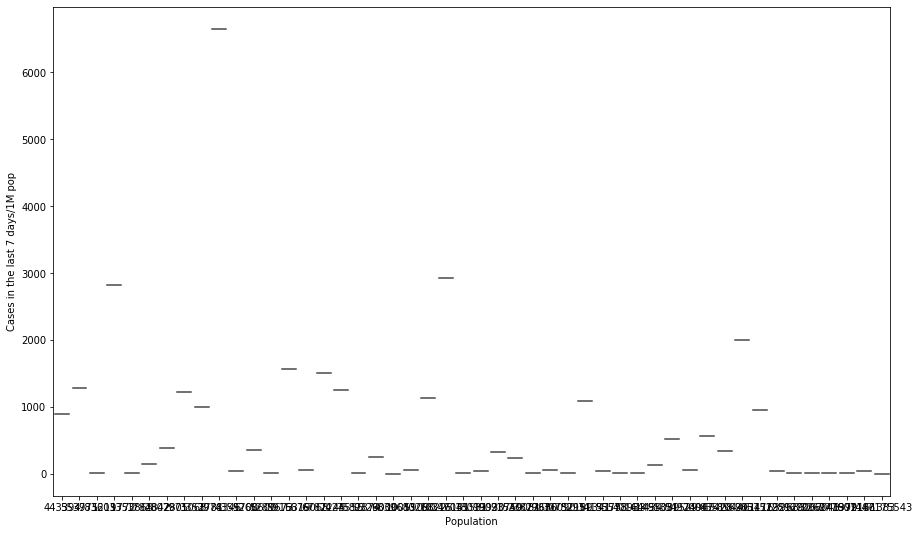

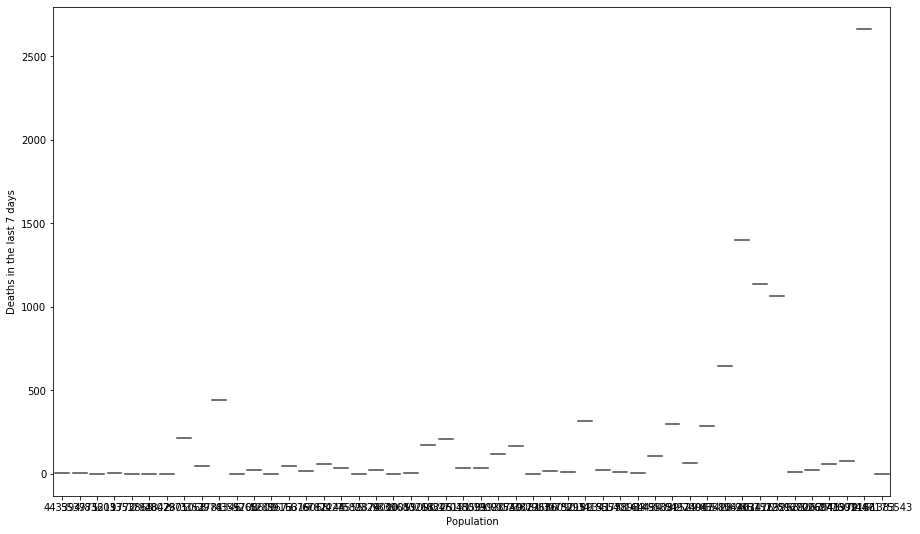

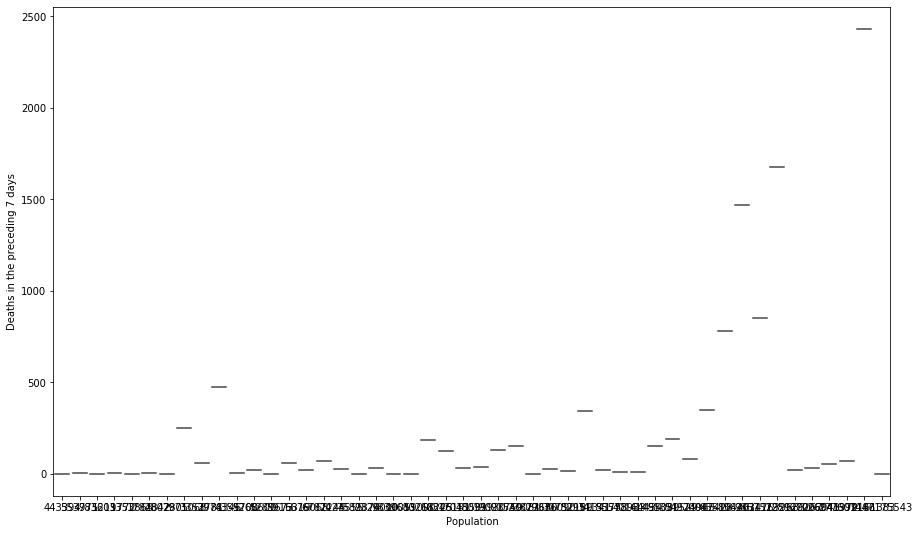

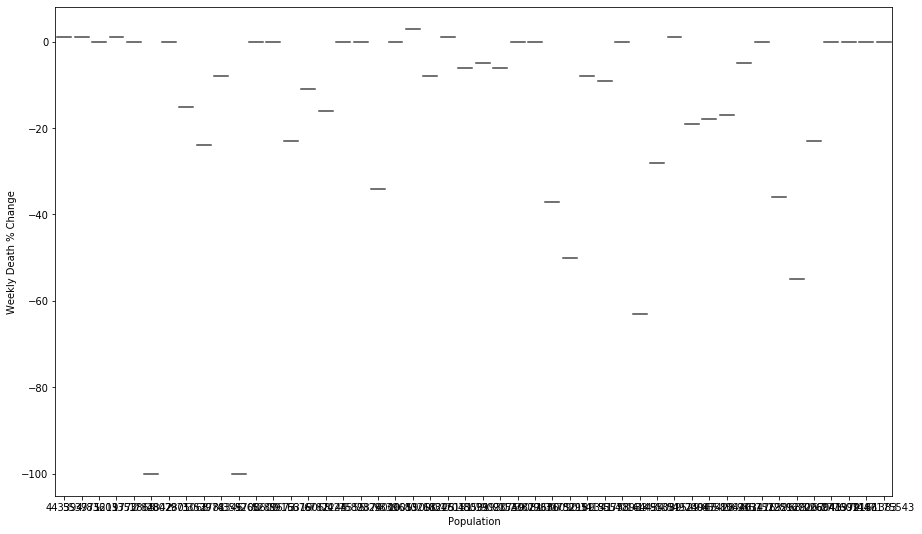

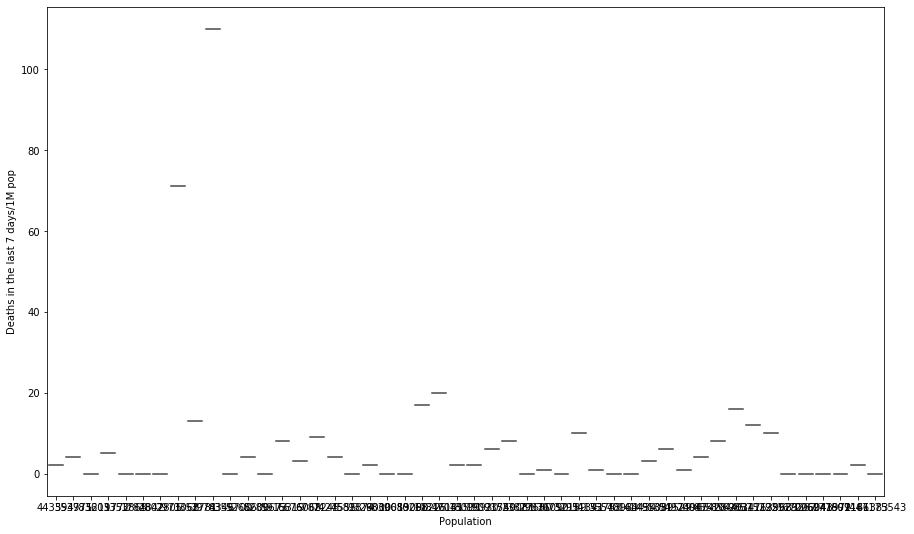

In [82]:
for i in ['Country/Other', 'Cases in the last 7 days',
       'Cases in the preceding 7 days', 'Weekly Case % Change',
       'Cases in the last 7 days/1M pop', 'Deaths in the last 7 days',
       'Deaths in the preceding 7 days', 'Weekly Death % Change',
       'Deaths in the last 7 days/1M pop']:
    plt.figure(figsize=(15,9))
    sns.boxenplot(x=df.Population,y=df[i],data=df,linewidth=1)
    plt.show()

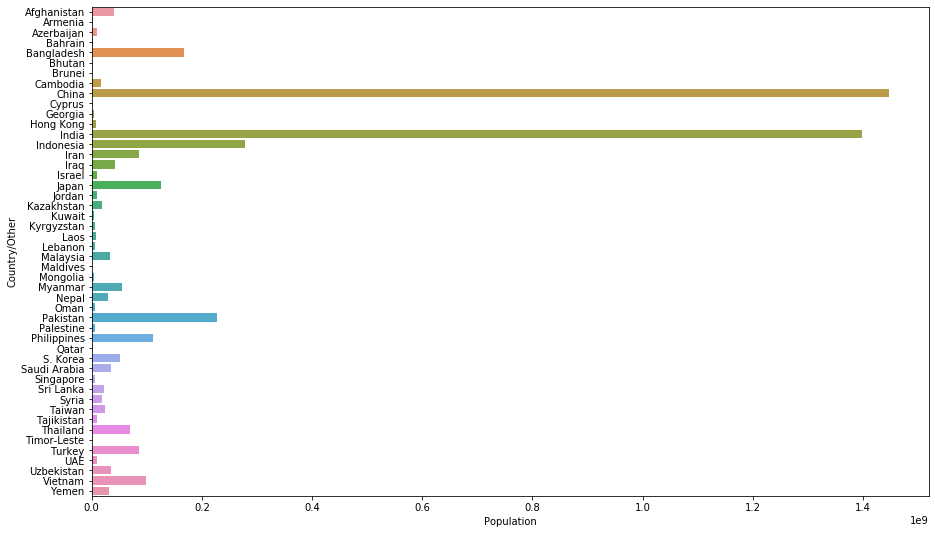

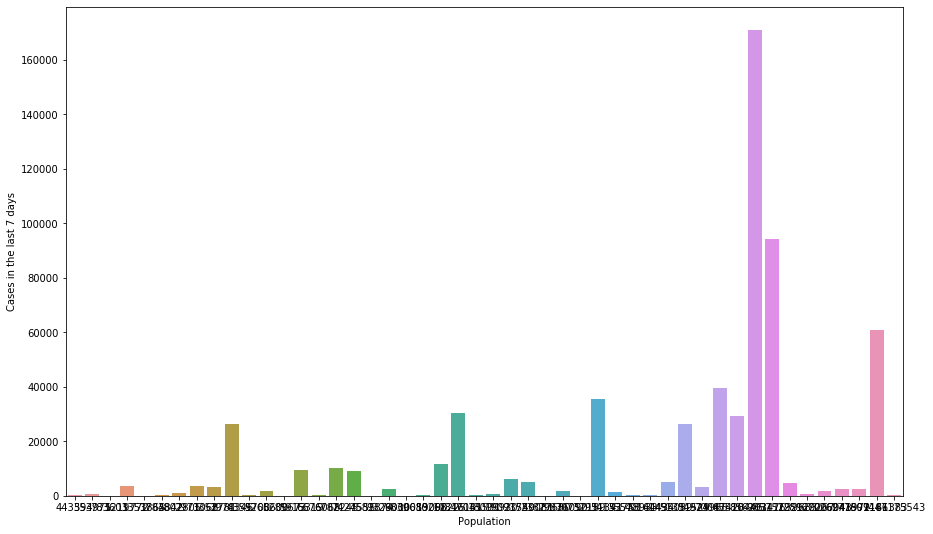

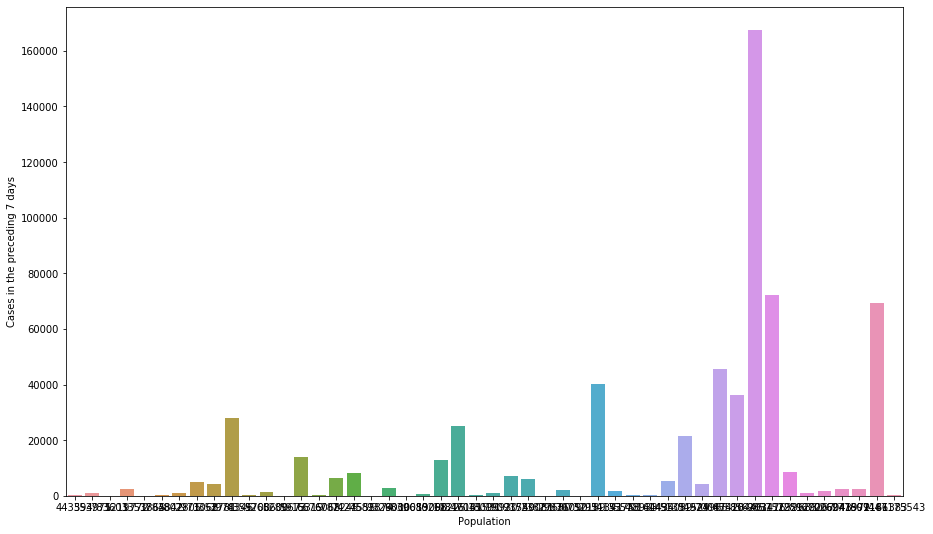

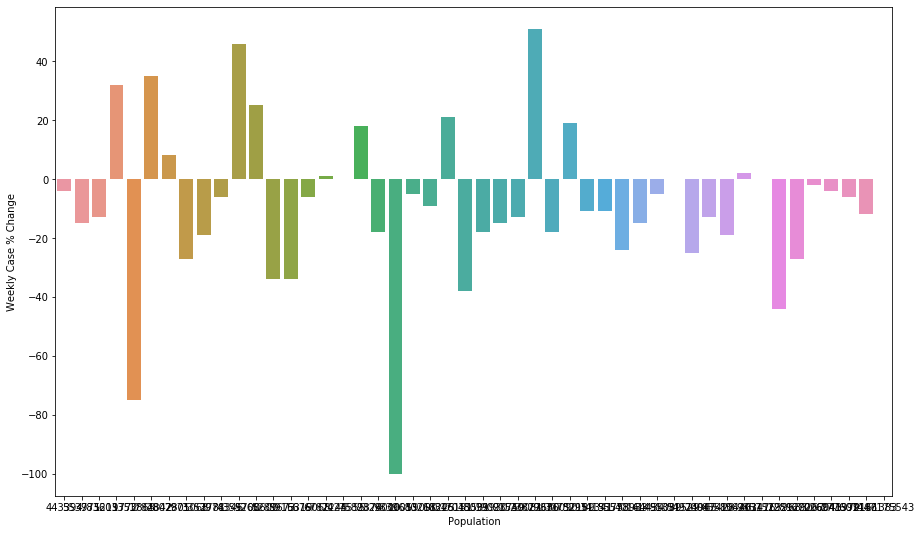

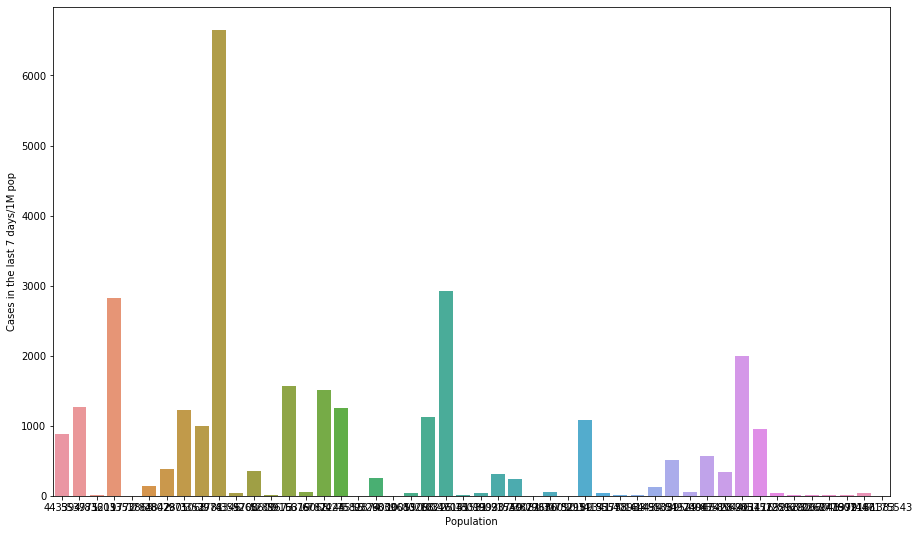

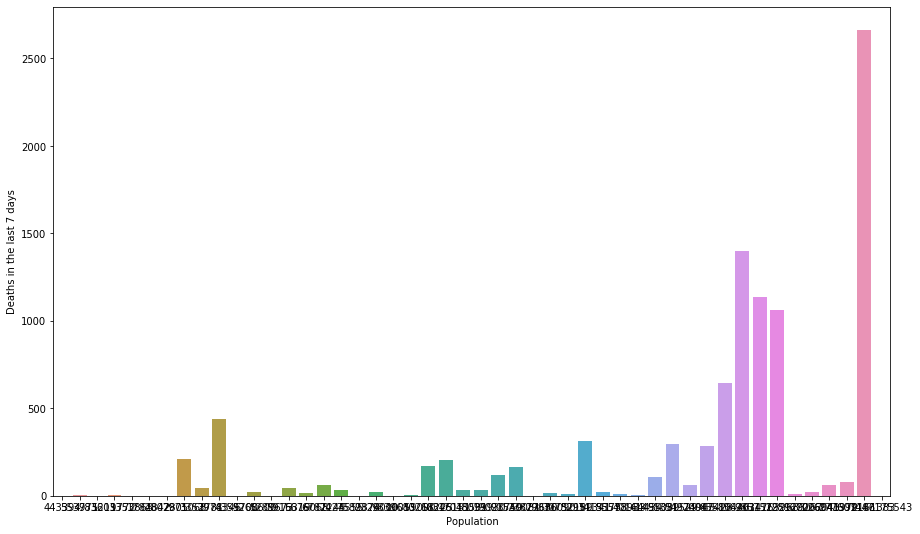

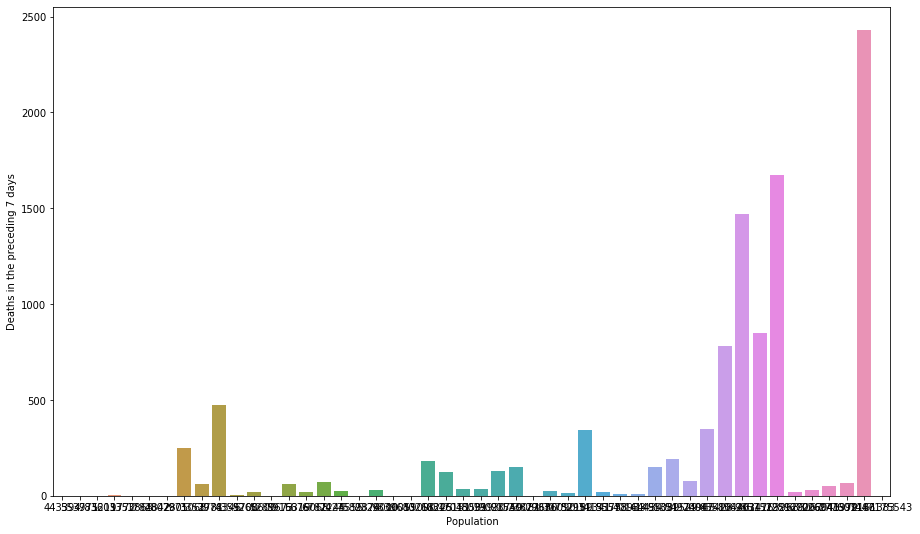

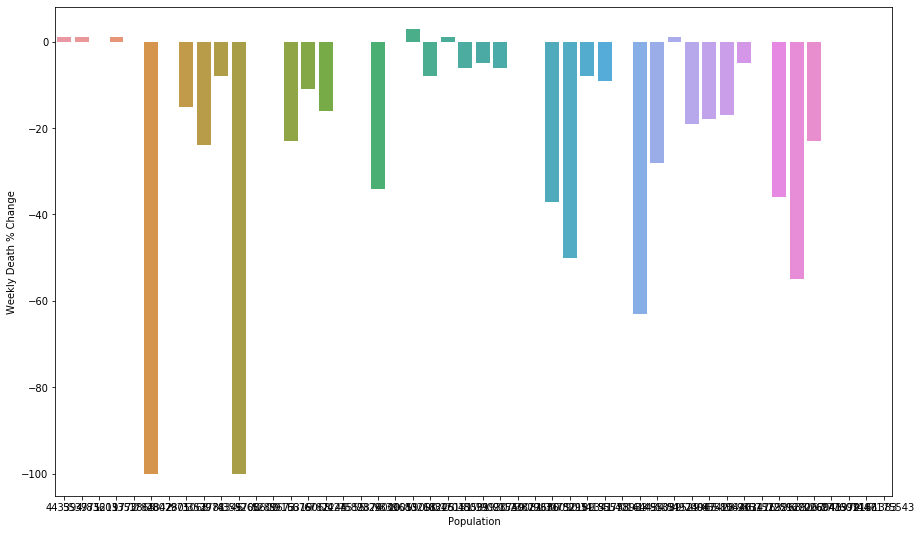

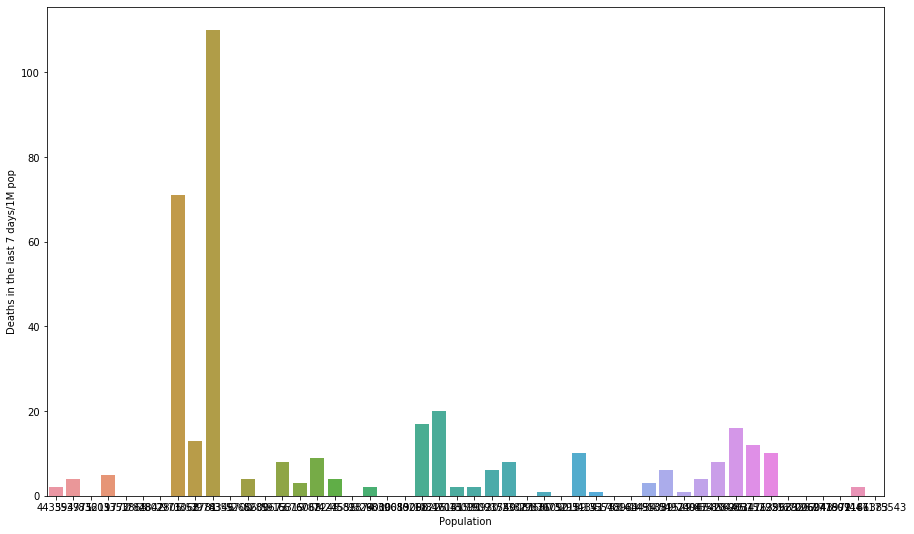

In [87]:
for i in ['Country/Other', 'Cases in the last 7 days',
       'Cases in the preceding 7 days', 'Weekly Case % Change',
       'Cases in the last 7 days/1M pop', 'Deaths in the last 7 days',
       'Deaths in the preceding 7 days', 'Weekly Death % Change',
       'Deaths in the last 7 days/1M pop']:
    plt.figure(figsize=(15,9))
    sns.barplot(x=df.Population,y=df[i],data=df,linewidth=1)
    plt.show()

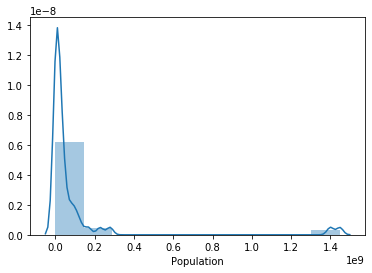

In [88]:
sns.distplot(df['Population'],bins=10)

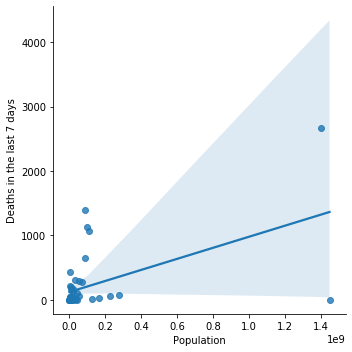

In [92]:
sns.lmplot(x='Population',y='Deaths in the last 7 days',data=df)

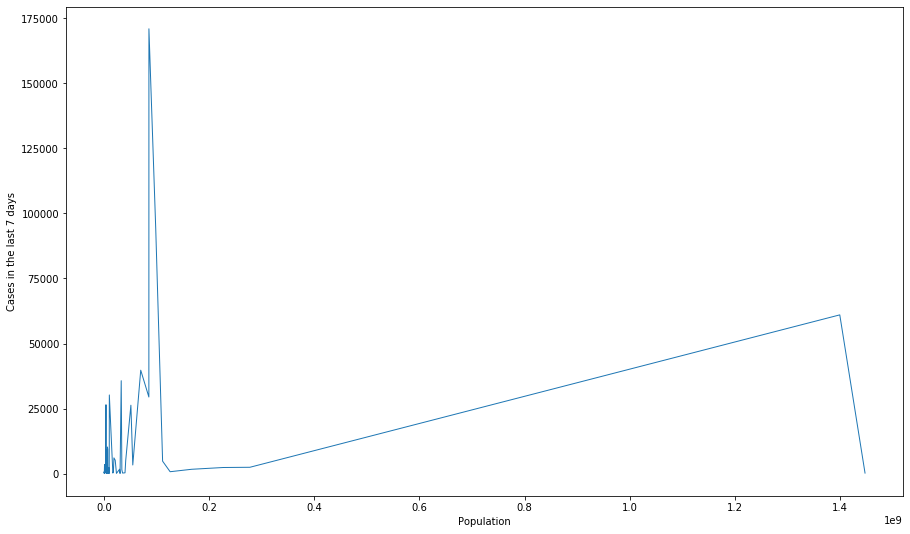

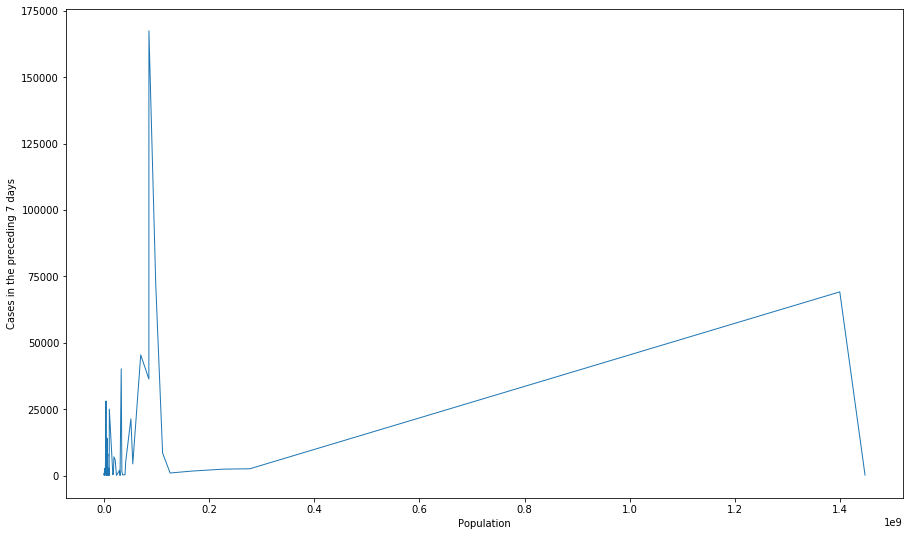

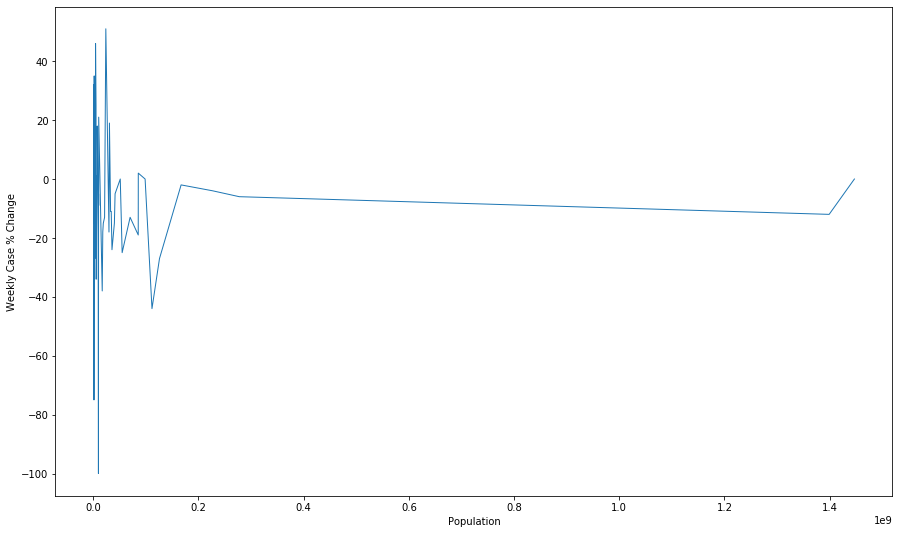

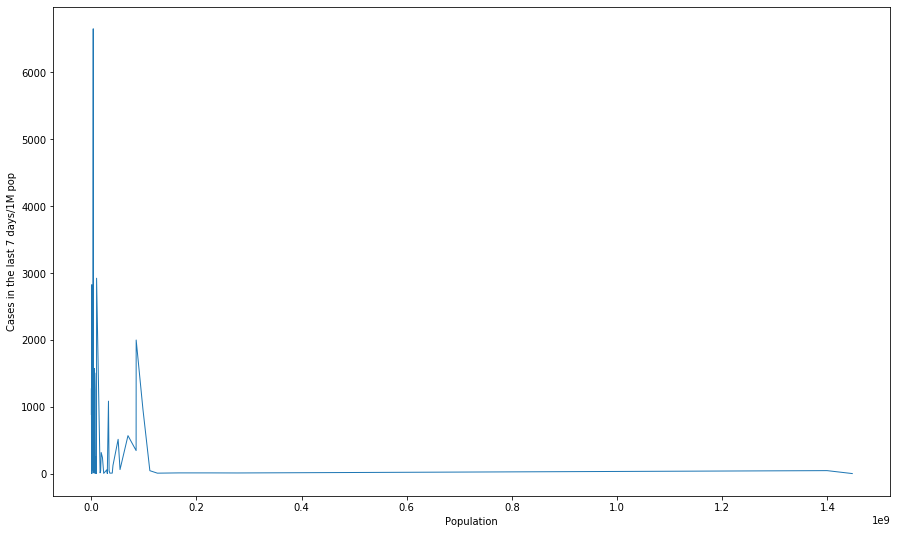

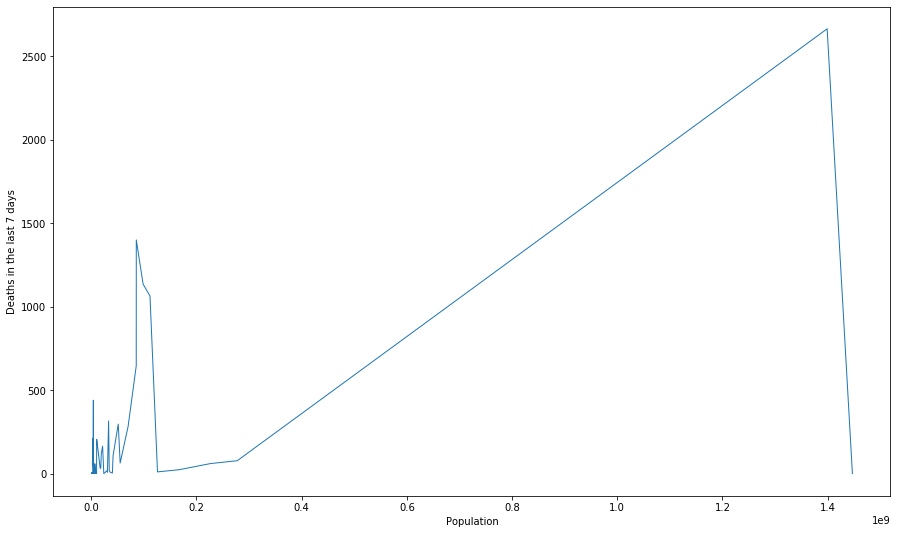

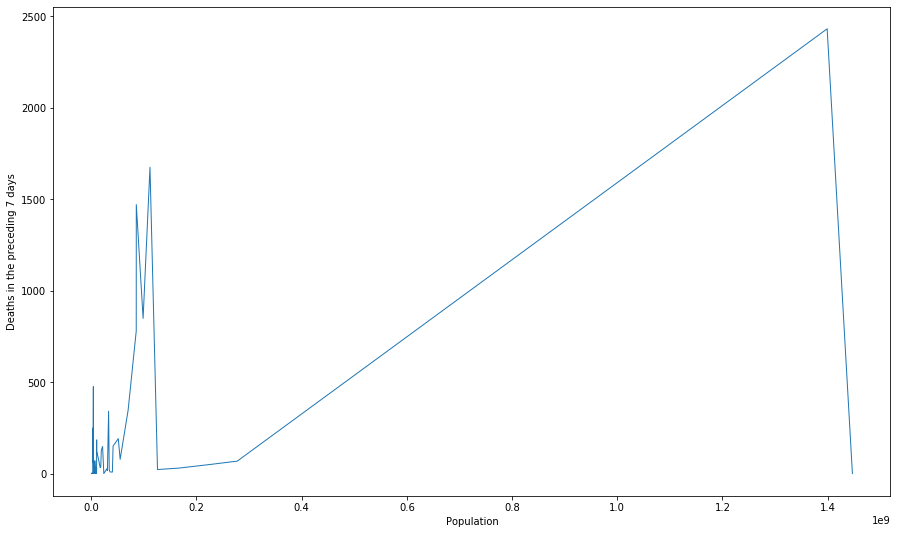

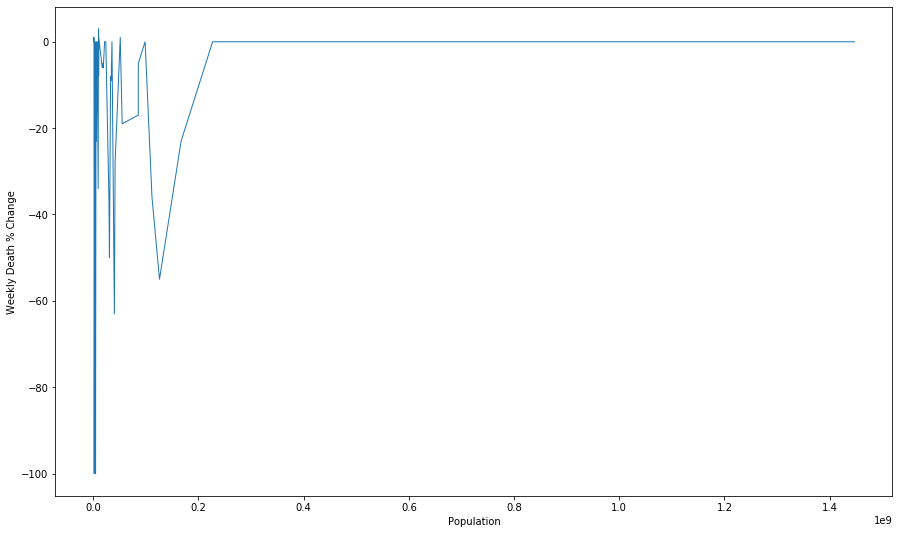

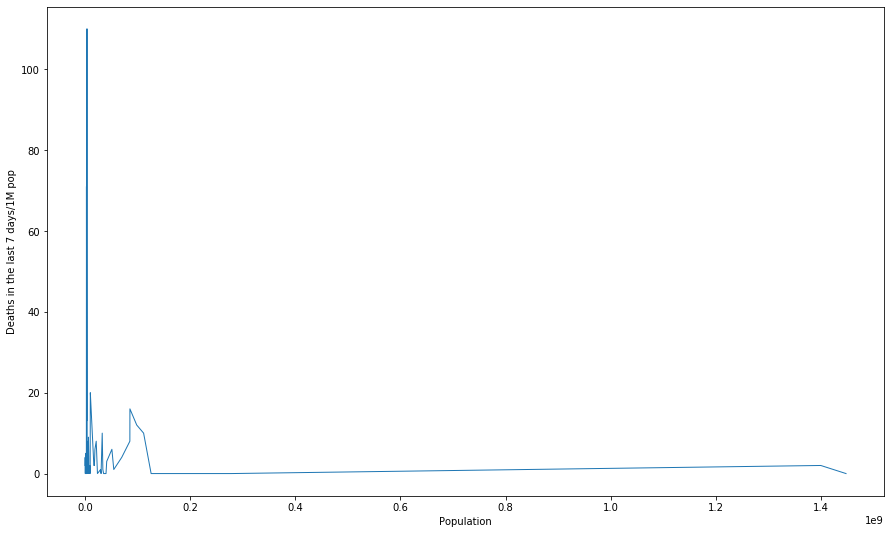

In [94]:
for i in [ 'Cases in the last 7 days',
       'Cases in the preceding 7 days', 'Weekly Case % Change',
       'Cases in the last 7 days/1M pop', 'Deaths in the last 7 days',
       'Deaths in the preceding 7 days', 'Weekly Death % Change',
       'Deaths in the last 7 days/1M pop']:
    plt.figure(figsize=(15,9))
    sns.lineplot(x=df.Population,y=df[i],data=df,linewidth=1)
    plt.show()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


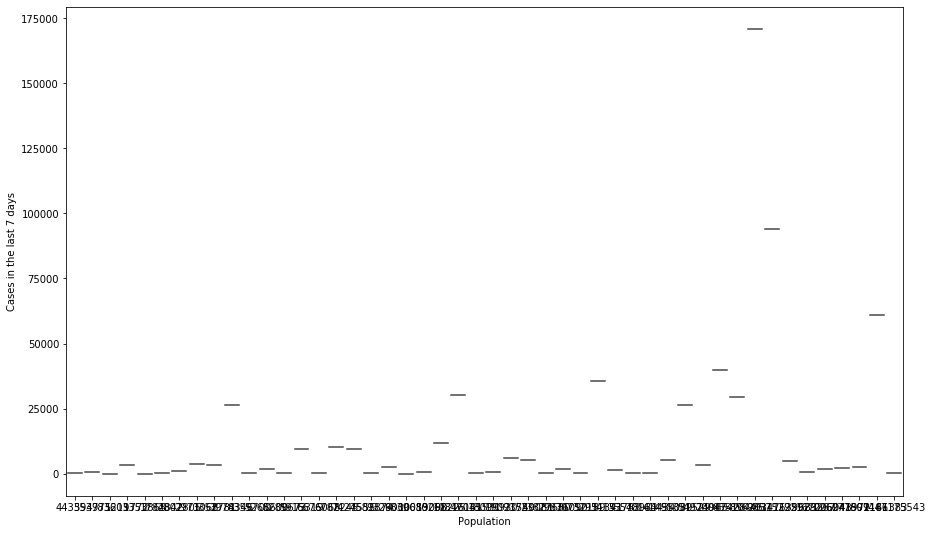

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


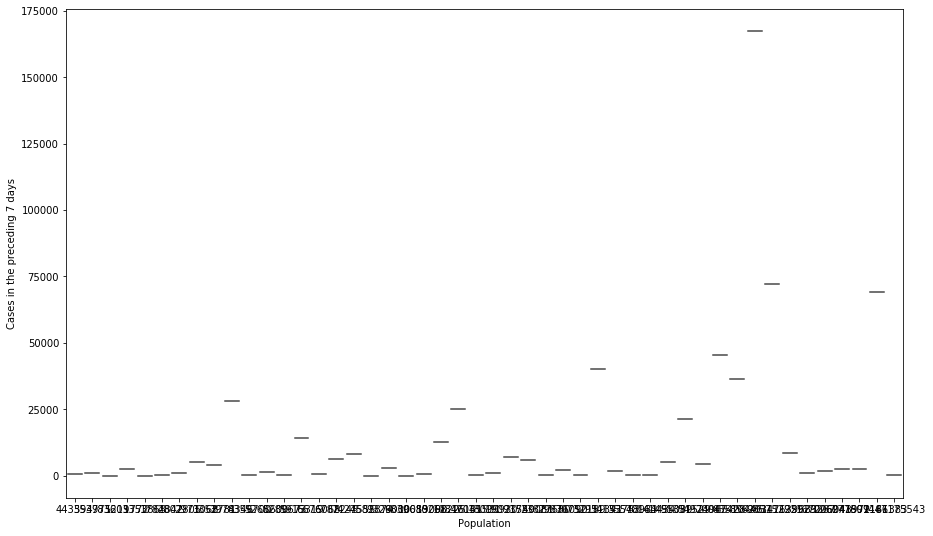

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


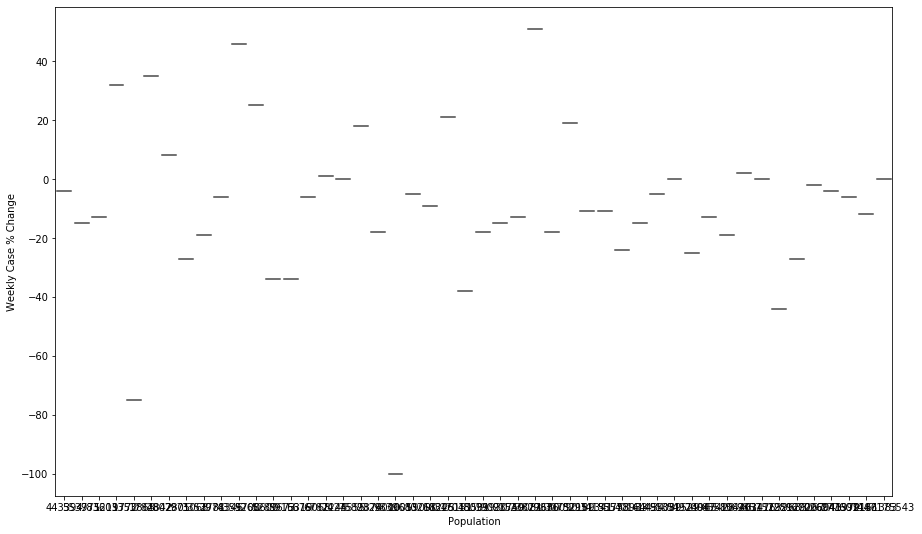

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


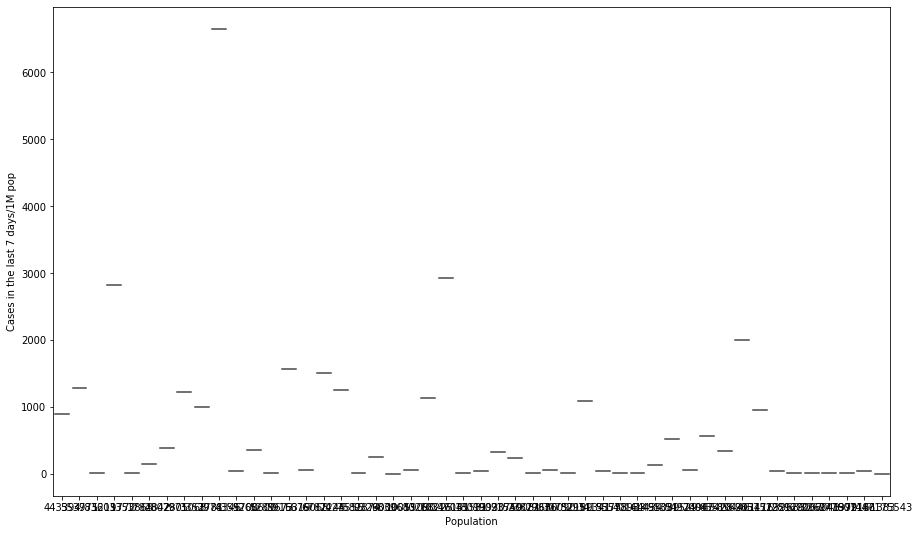

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


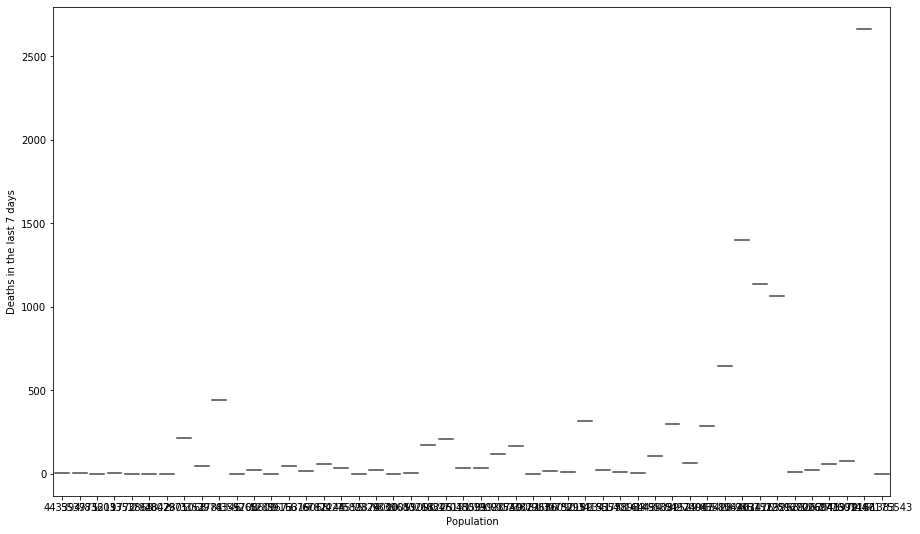

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


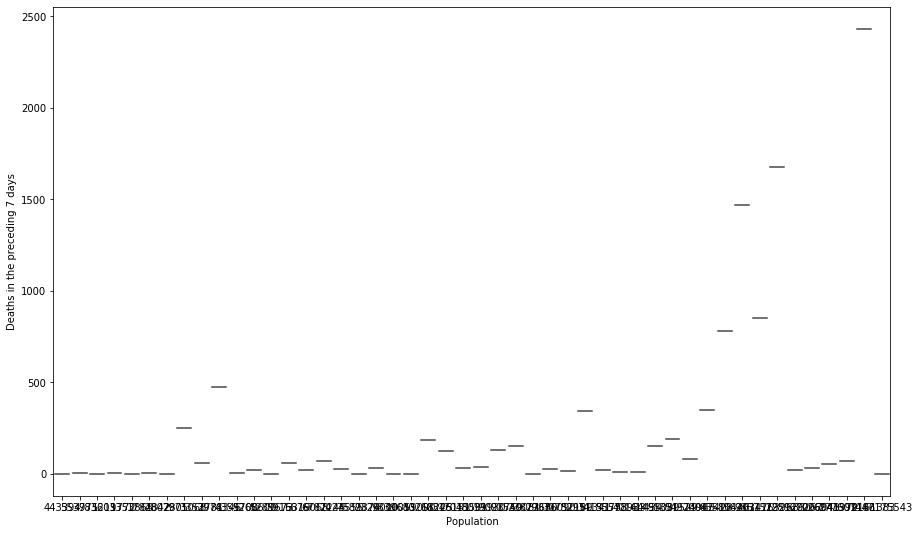

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


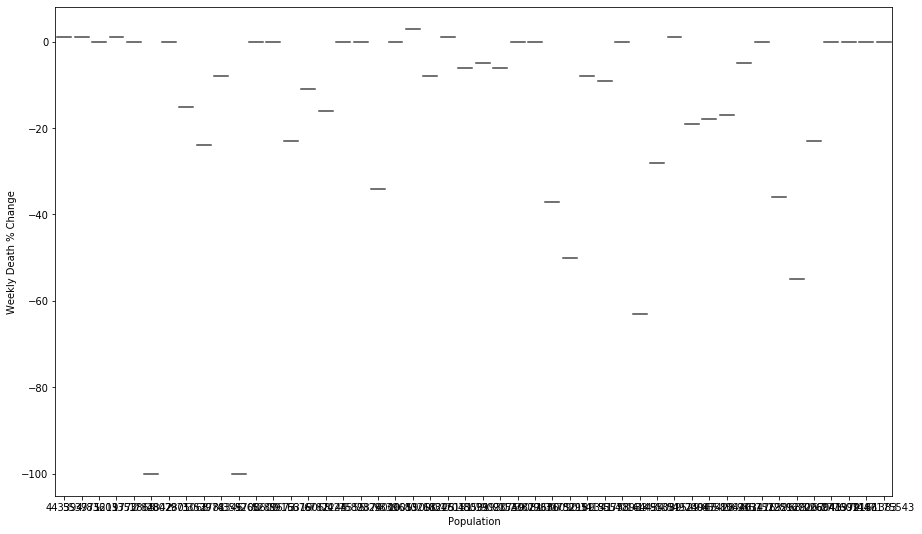

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


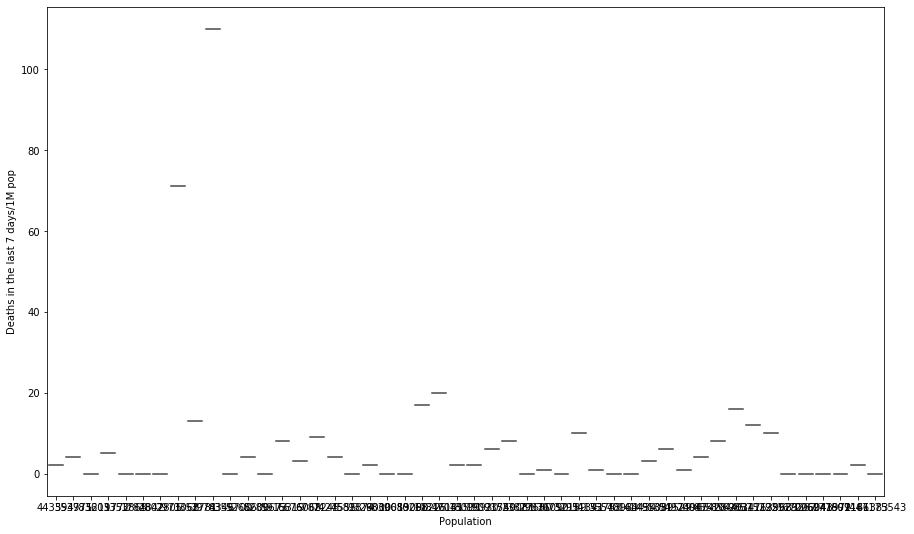

In [95]:
for i in [ 'Cases in the last 7 days',
       'Cases in the preceding 7 days', 'Weekly Case % Change',
       'Cases in the last 7 days/1M pop', 'Deaths in the last 7 days',
       'Deaths in the preceding 7 days', 'Weekly Death % Change',
       'Deaths in the last 7 days/1M pop']:
    plt.figure(figsize=(15,9))
    sns.lvplot(x=df.Population,y=df[i],data=df,linewidth=1)
    plt.show()

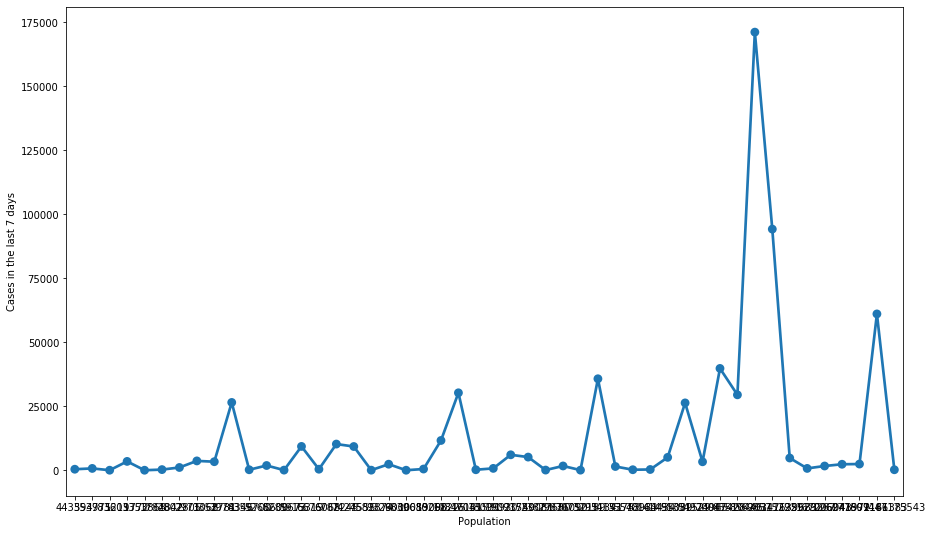

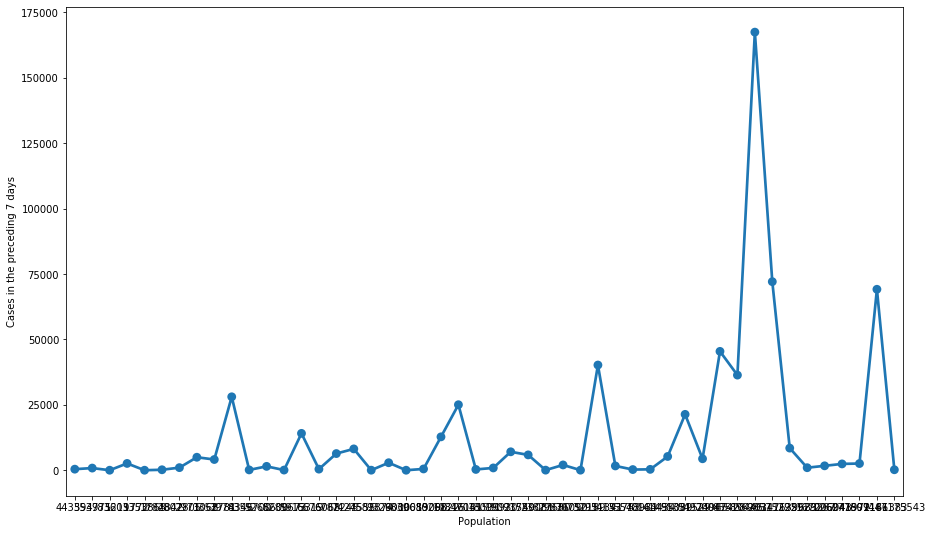

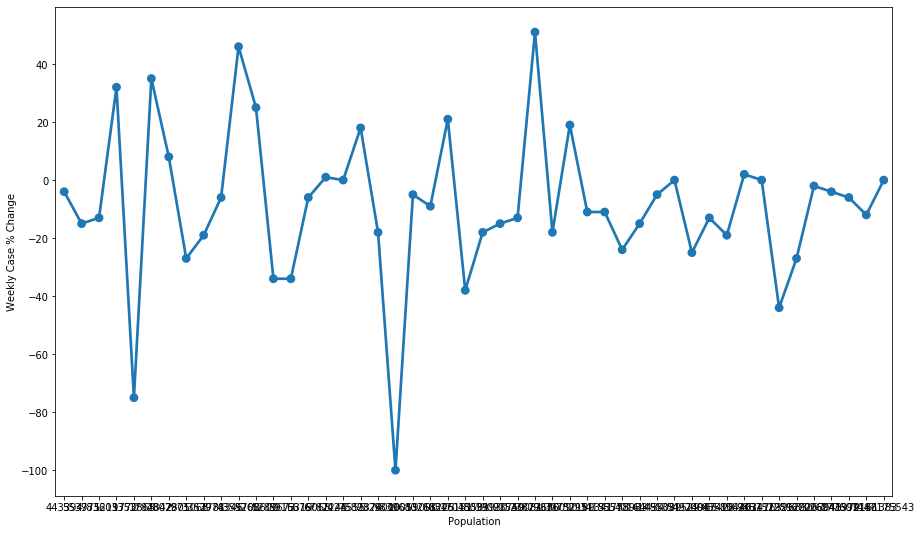

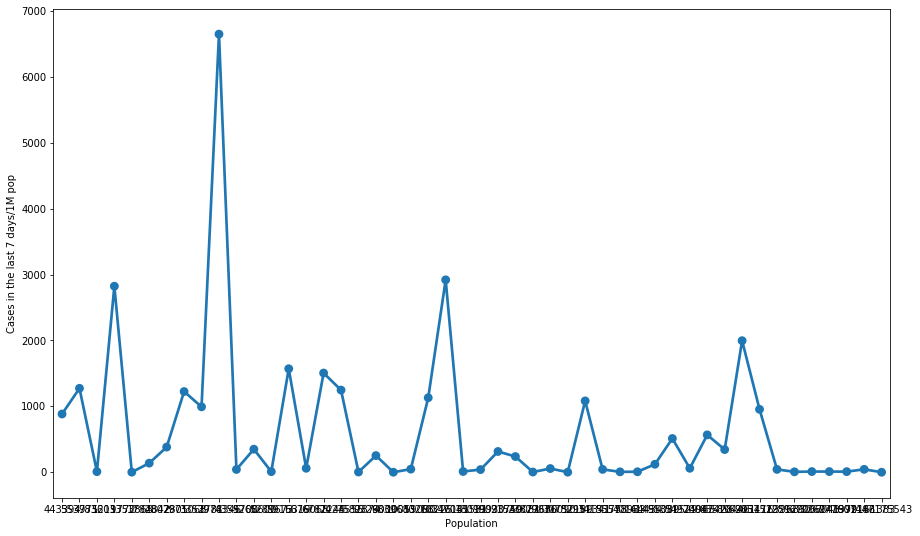

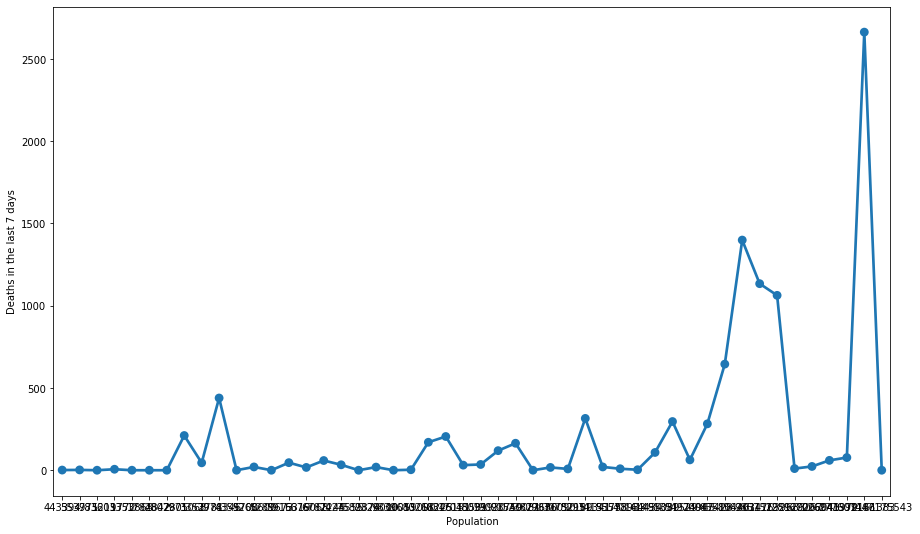

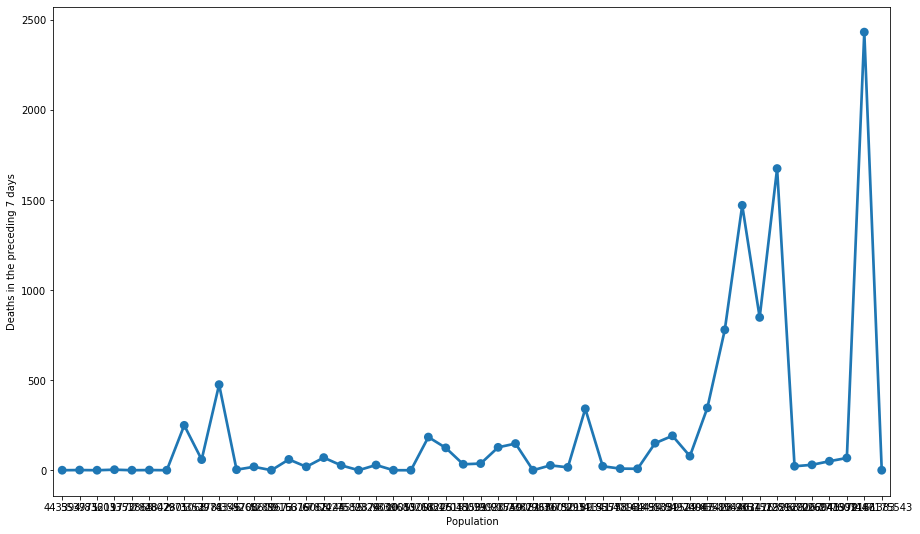

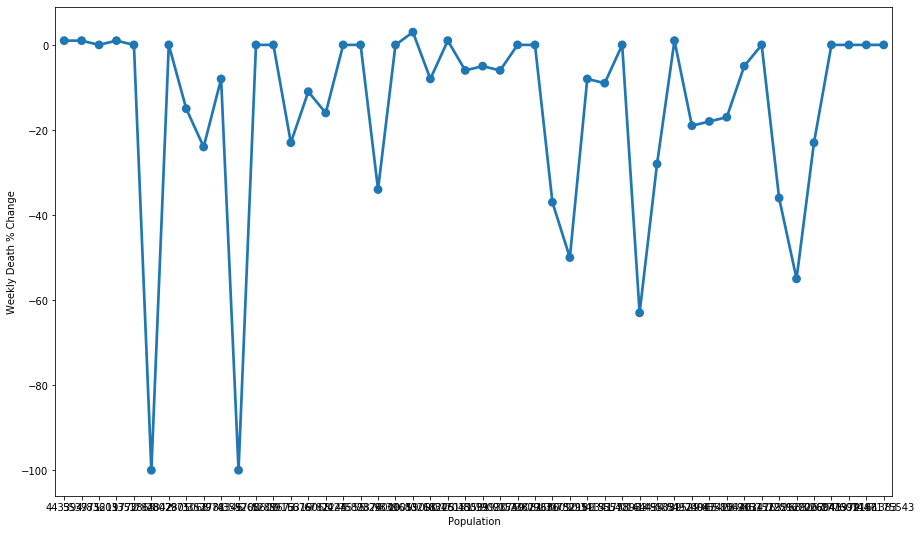

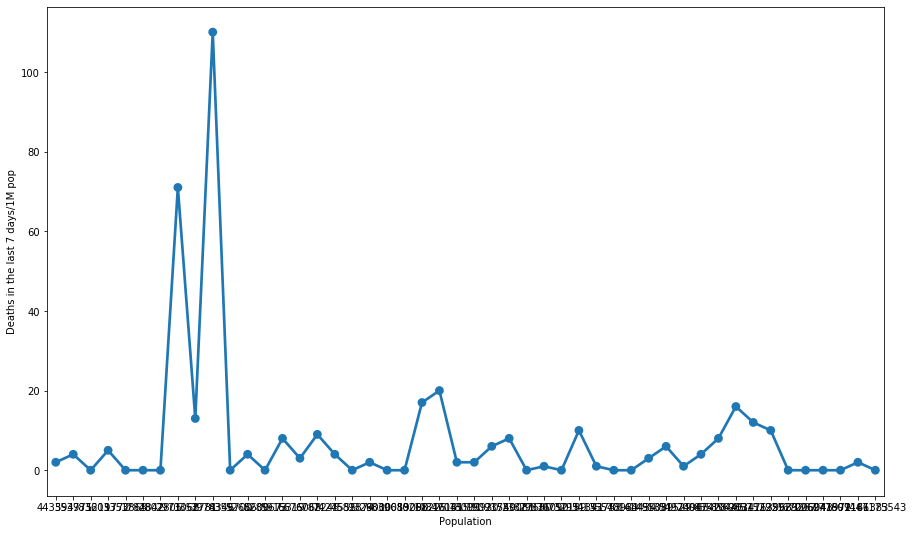

In [96]:
for i in [ 'Cases in the last 7 days',
       'Cases in the preceding 7 days', 'Weekly Case % Change',
       'Cases in the last 7 days/1M pop', 'Deaths in the last 7 days',
       'Deaths in the preceding 7 days', 'Weekly Death % Change',
       'Deaths in the last 7 days/1M pop']:
    plt.figure(figsize=(15,9))
    sns.pointplot(x=df.Population,y=df[i],data=df,linewidth=1)
    plt.show()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\distributions.py:437: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


<Figure size 1080x648 with 0 Axes>

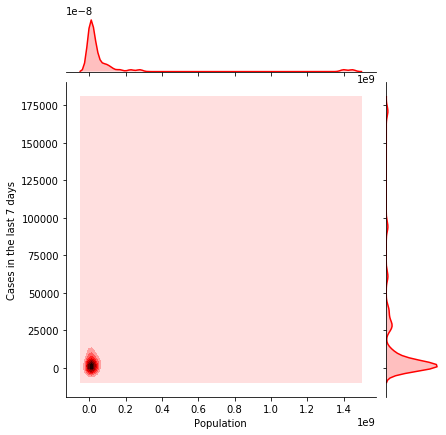

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\distributions.py:437: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


<Figure size 1080x648 with 0 Axes>

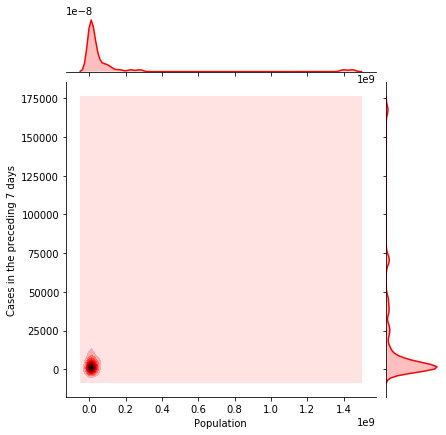

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\distributions.py:437: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


<Figure size 1080x648 with 0 Axes>

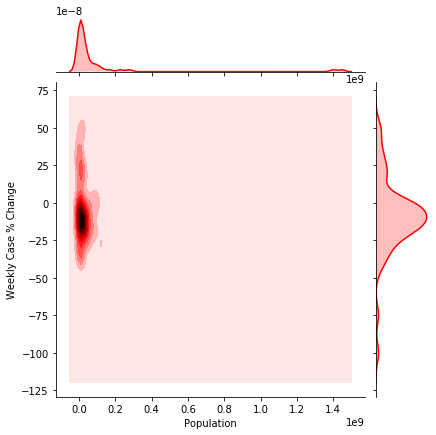

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\distributions.py:437: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


<Figure size 1080x648 with 0 Axes>

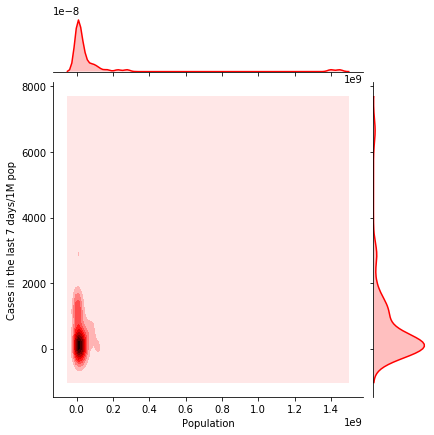

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\distributions.py:437: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


<Figure size 1080x648 with 0 Axes>

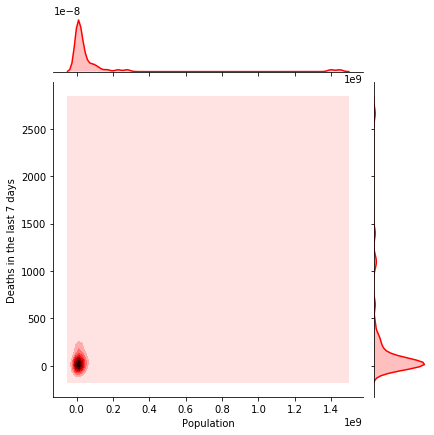

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\distributions.py:437: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


<Figure size 1080x648 with 0 Axes>

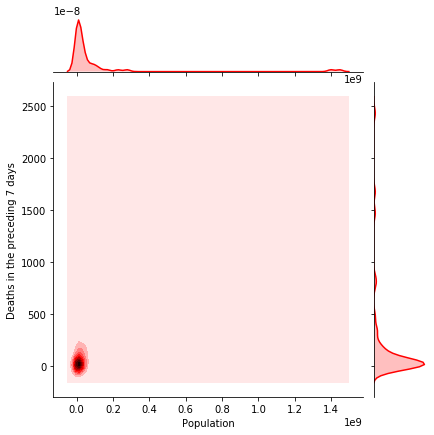

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\distributions.py:437: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


<Figure size 1080x648 with 0 Axes>

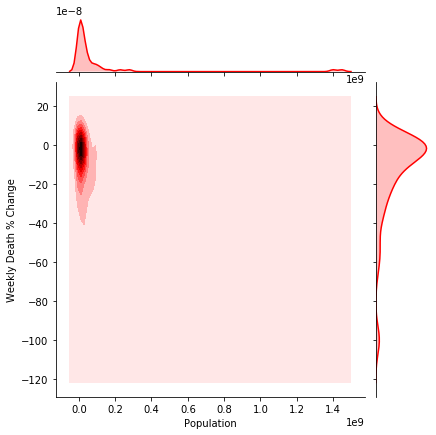

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\distributions.py:437: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


<Figure size 1080x648 with 0 Axes>

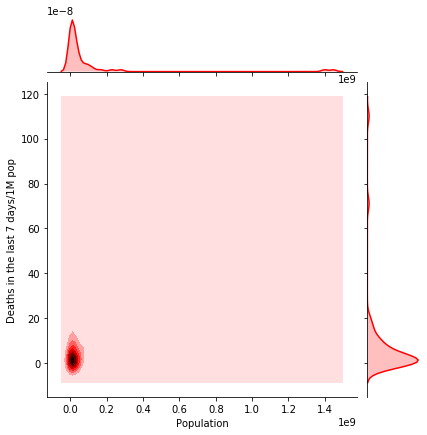

In [101]:
for i in ['Cases in the last 7 days',
       'Cases in the preceding 7 days', 'Weekly Case % Change',
       'Cases in the last 7 days/1M pop', 'Deaths in the last 7 days',
       'Deaths in the preceding 7 days', 'Weekly Death % Change',
       'Deaths in the last 7 days/1M pop']:
    plt.figure(figsize=(15,9))
    sns.jointplot(x=df.Population,y=df[i],data=df,kind='kde',color='red',linewidth=1)
    
    plt.show()

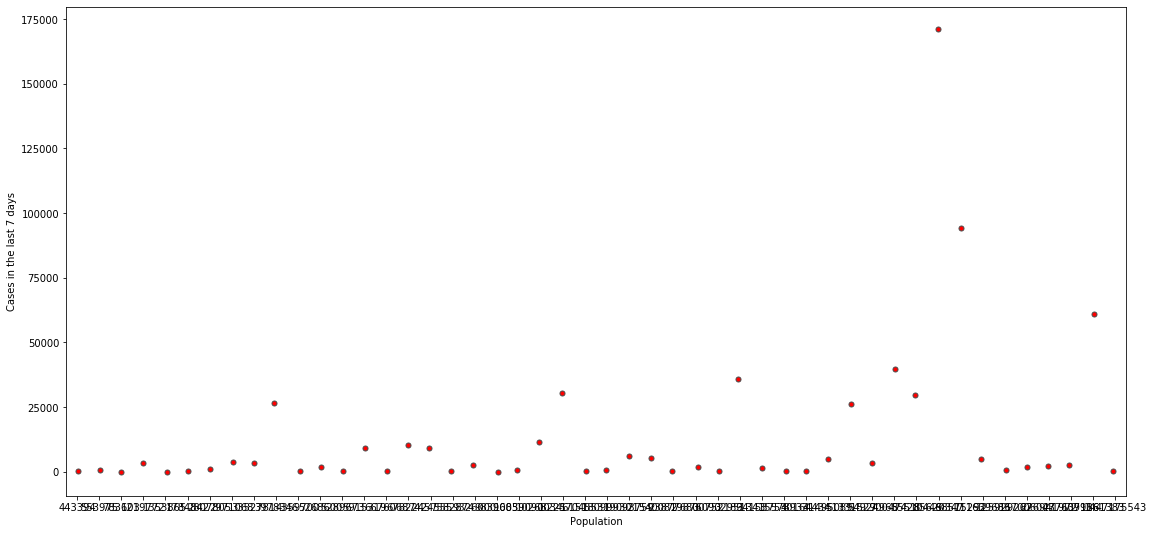

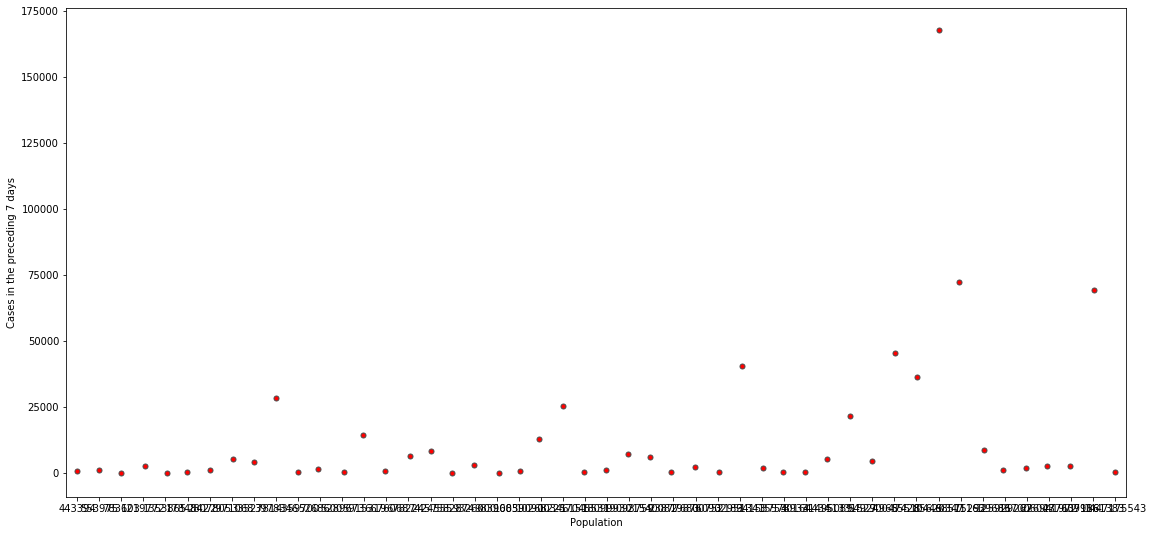

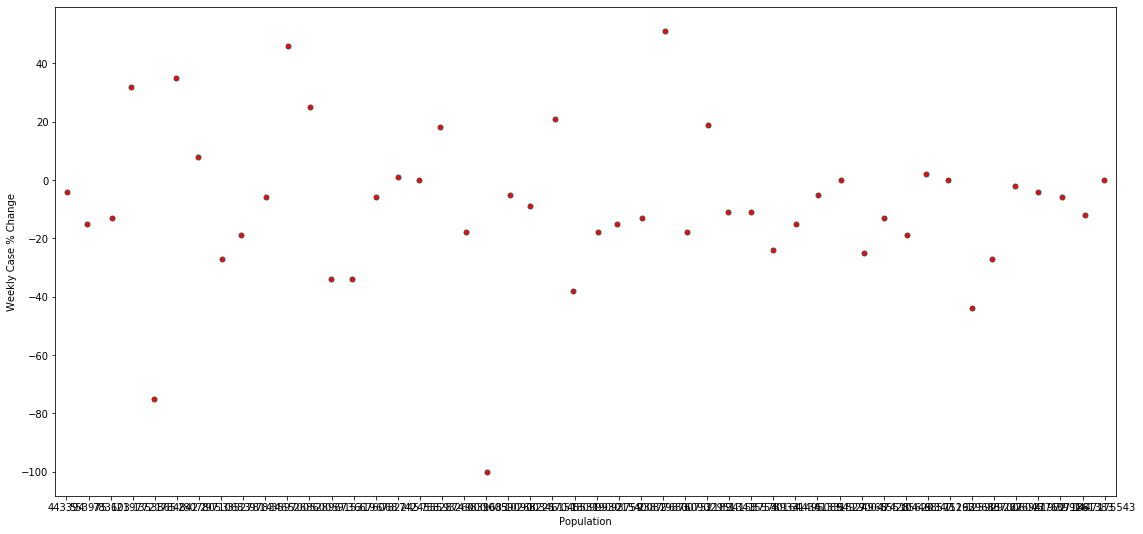

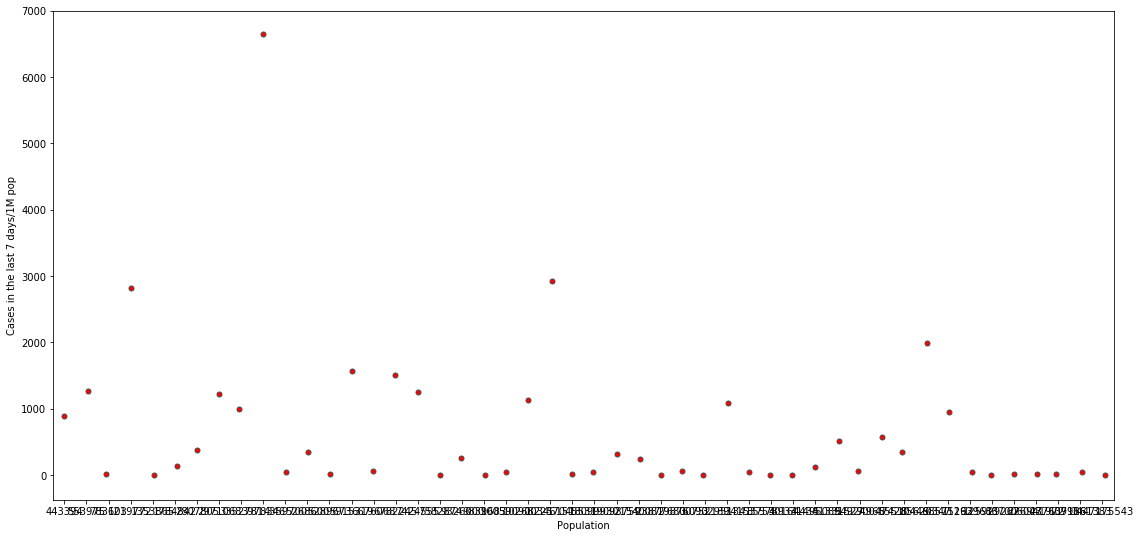

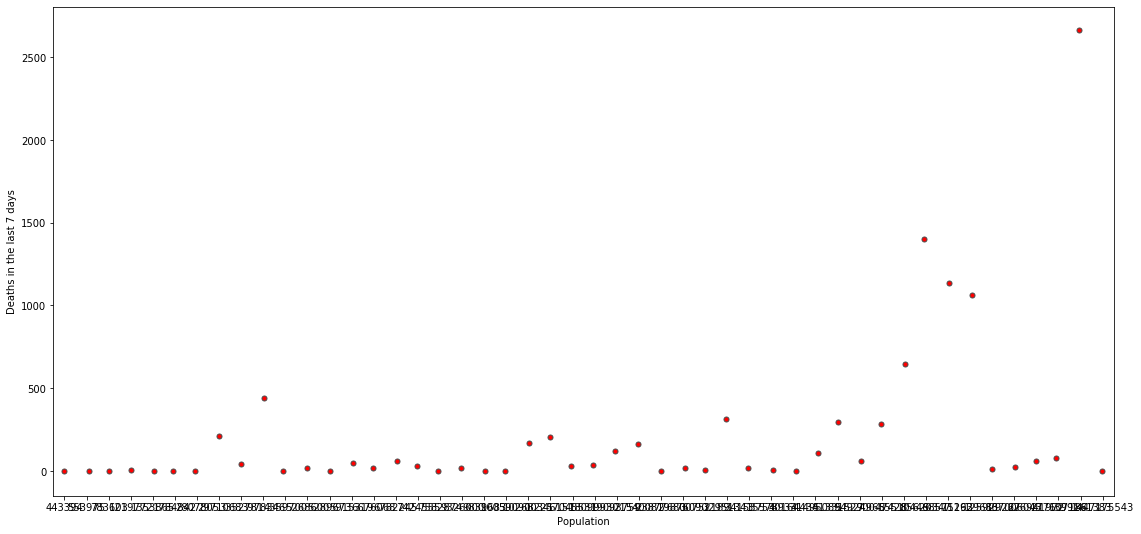

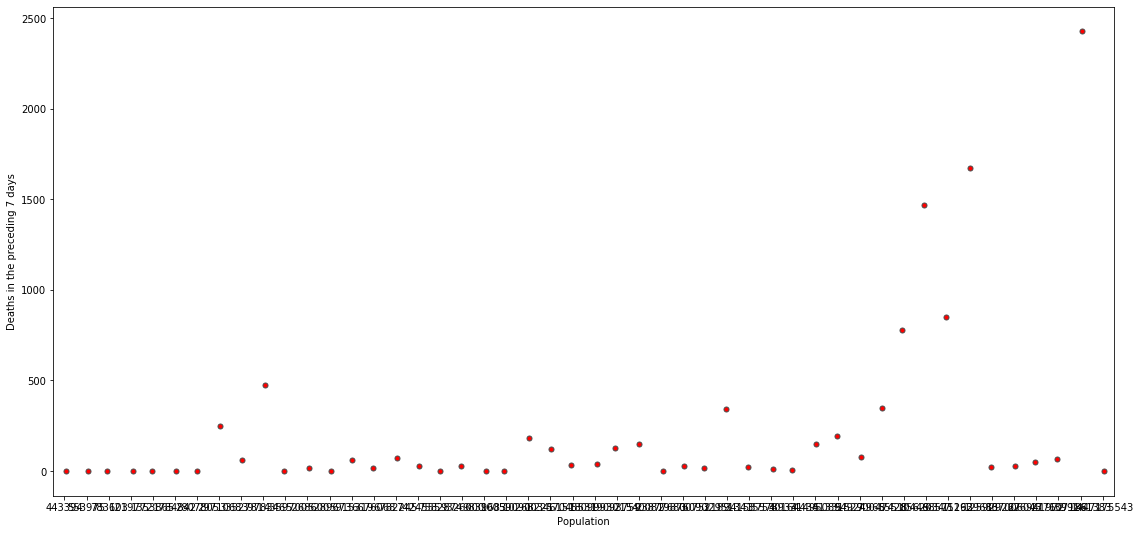

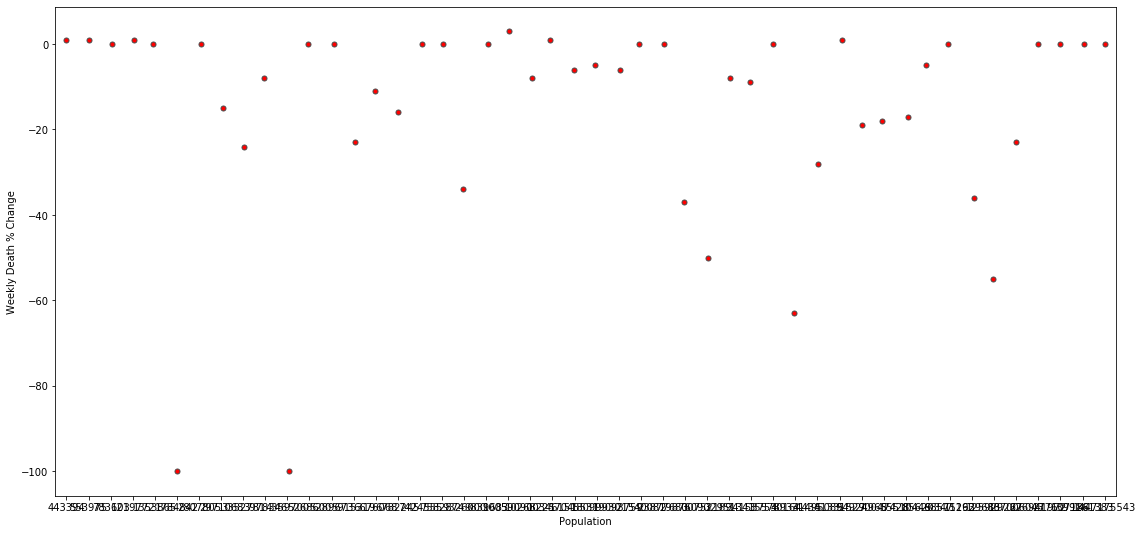

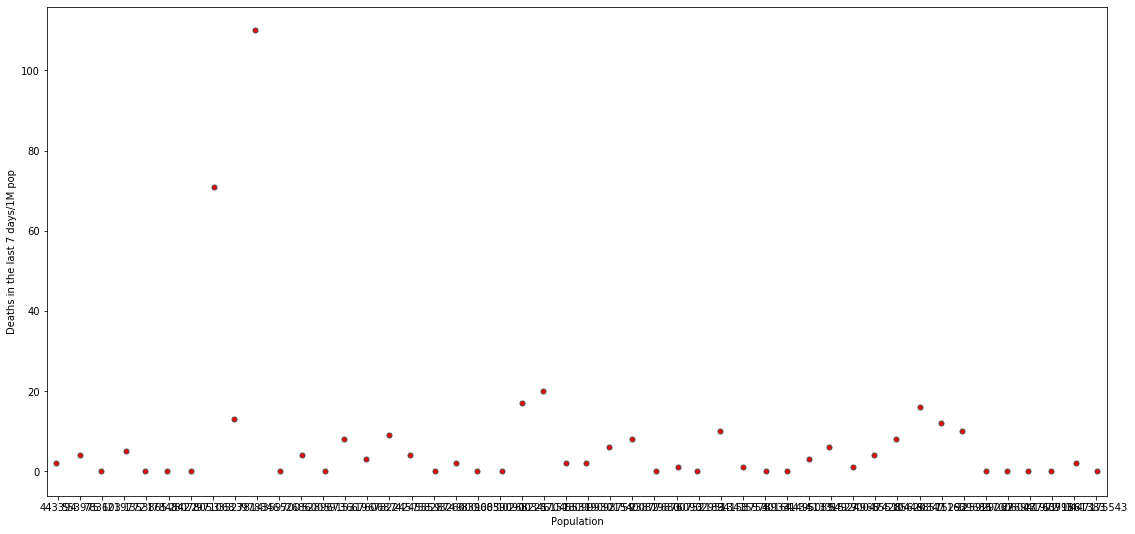

In [103]:
for i in ['Cases in the last 7 days',
       'Cases in the preceding 7 days', 'Weekly Case % Change',
       'Cases in the last 7 days/1M pop', 'Deaths in the last 7 days',
       'Deaths in the preceding 7 days', 'Weekly Death % Change',
       'Deaths in the last 7 days/1M pop']:
    plt.figure(figsize=(19,9))
    sns.stripplot(x=df.Population,y=df[i],data=df,color='red',linewidth=1)
    
    plt.show()

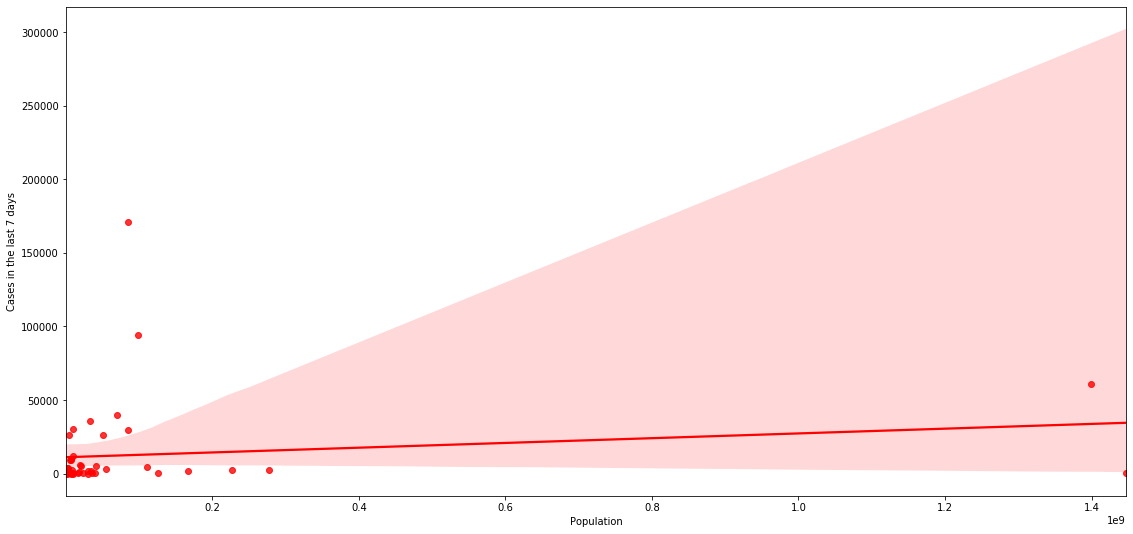

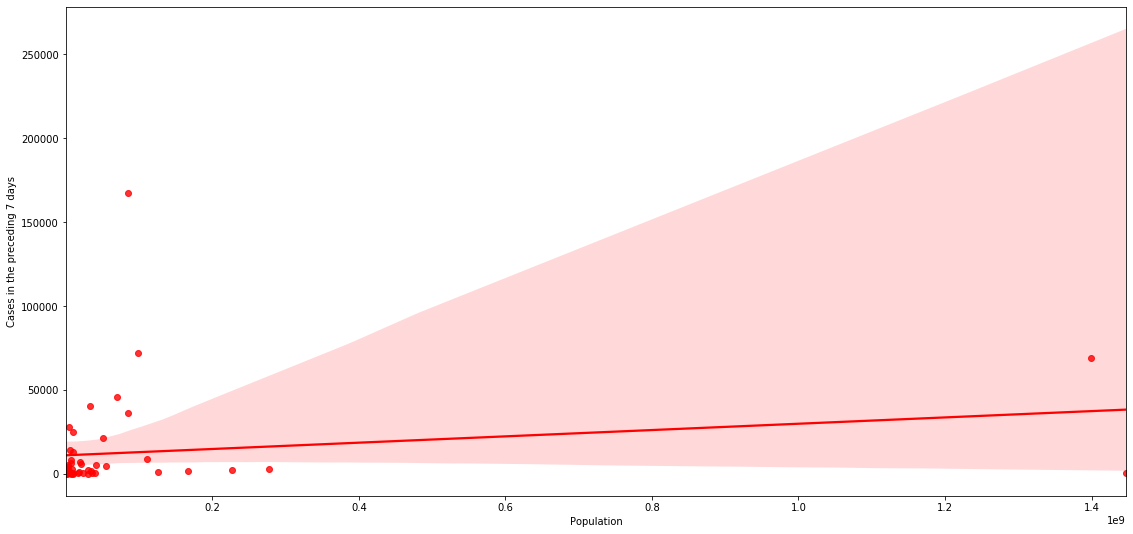

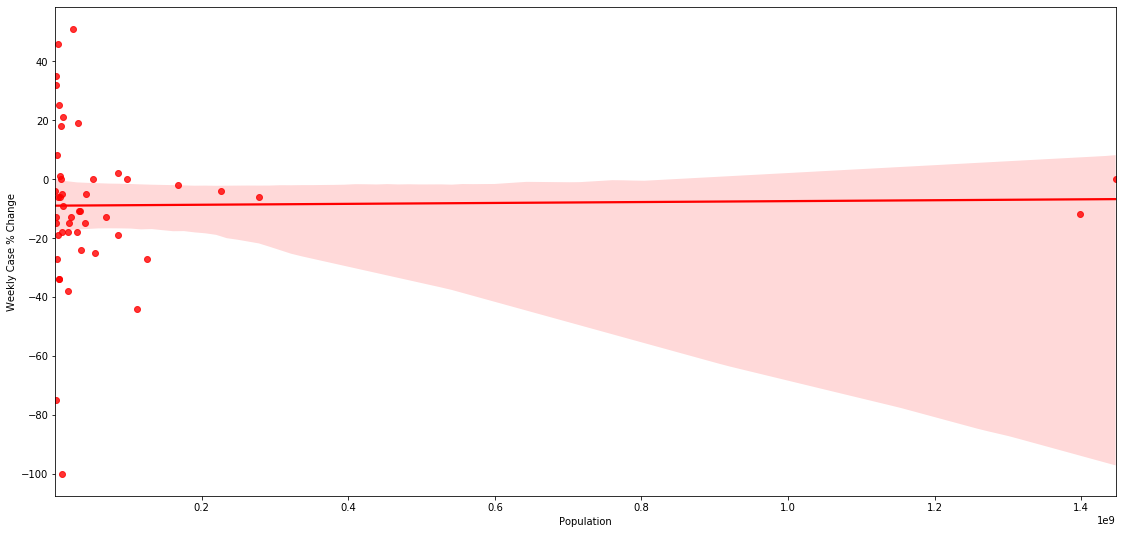

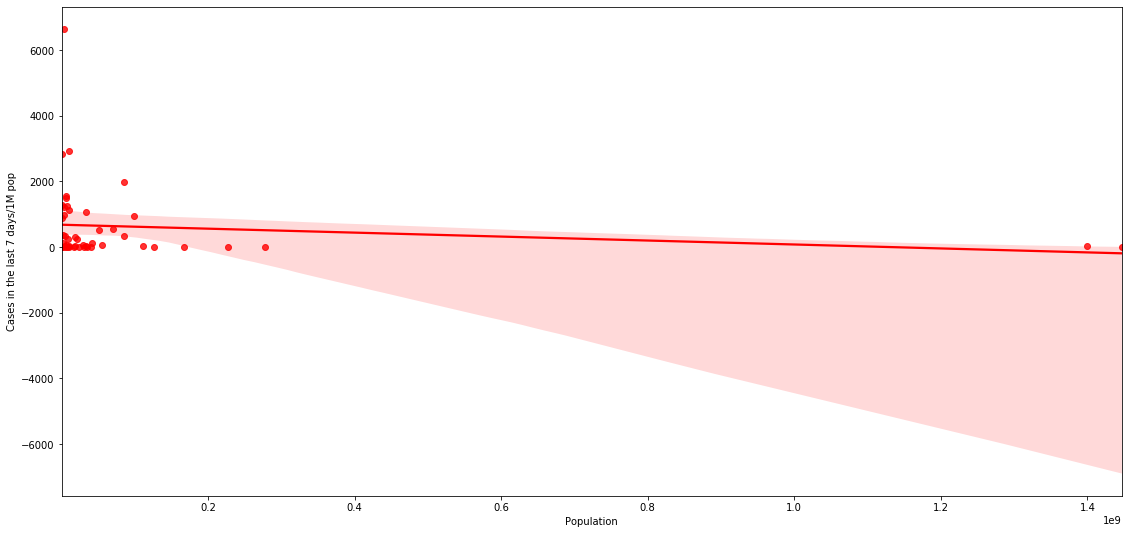

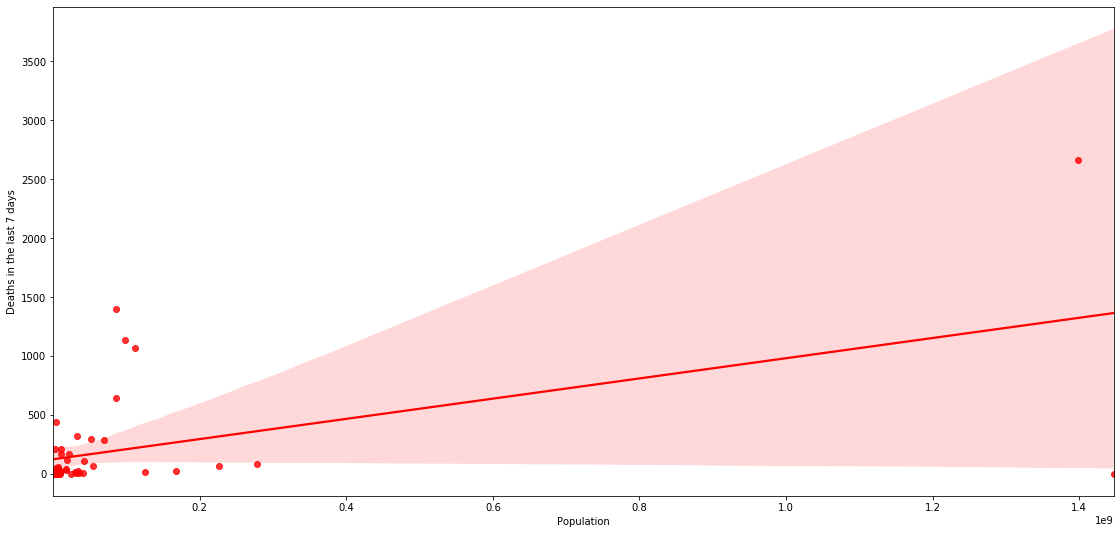

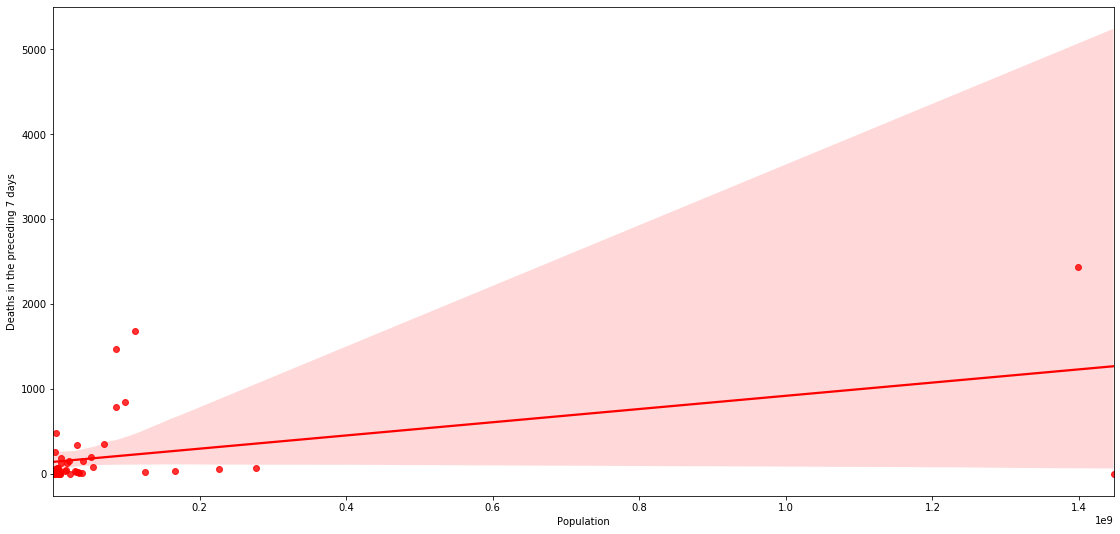

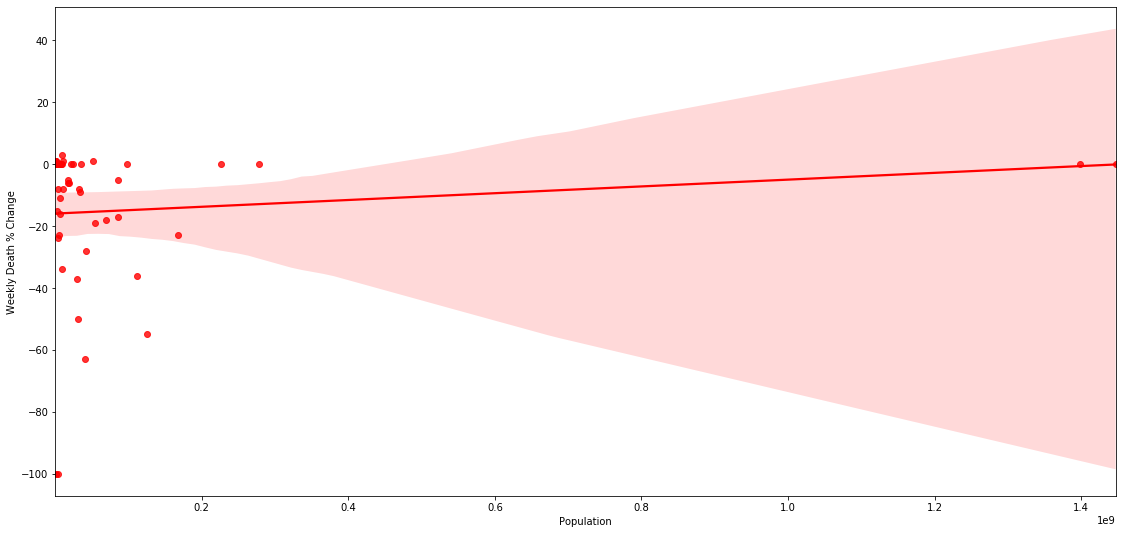

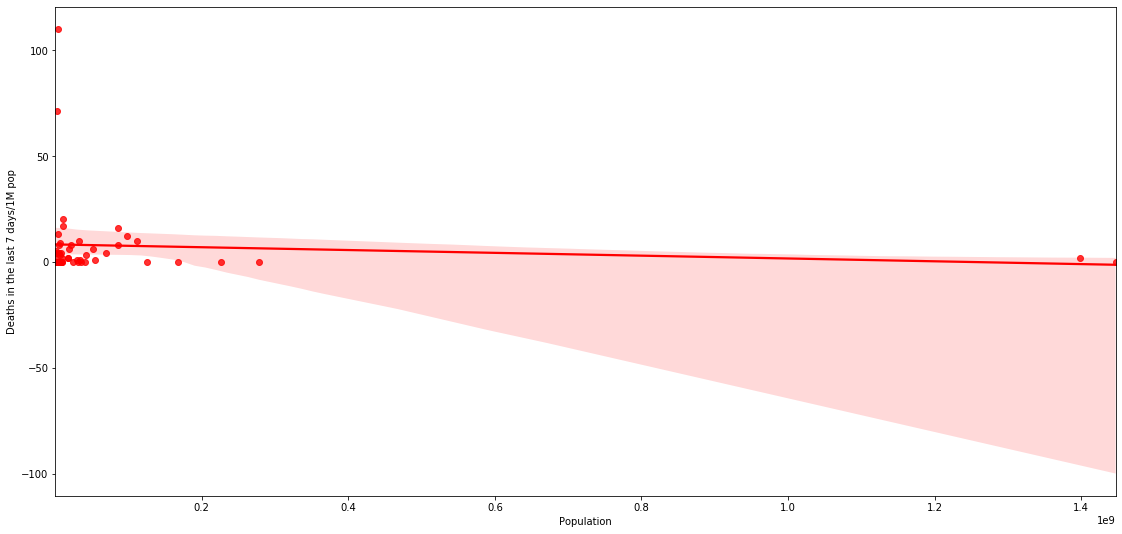

In [108]:
for i in ['Cases in the last 7 days',
       'Cases in the preceding 7 days', 'Weekly Case % Change',
       'Cases in the last 7 days/1M pop', 'Deaths in the last 7 days',
       'Deaths in the preceding 7 days', 'Weekly Death % Change',
       'Deaths in the last 7 days/1M pop']:
    plt.figure(figsize=(19,9))
    sns.regplot(x=df.Population,y=df[i],data=df,color='red')
    
    plt.show()

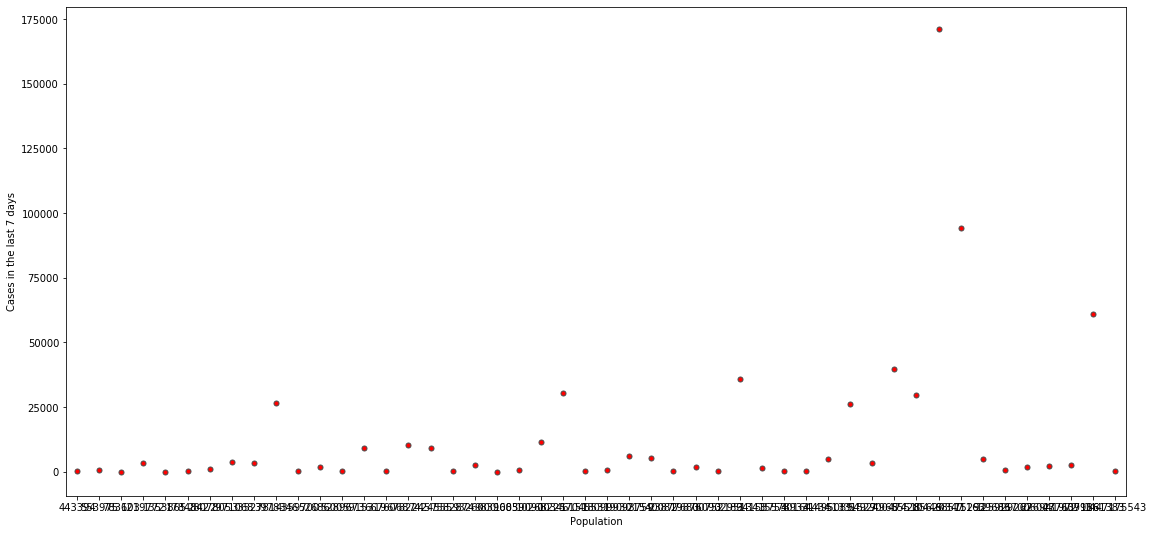

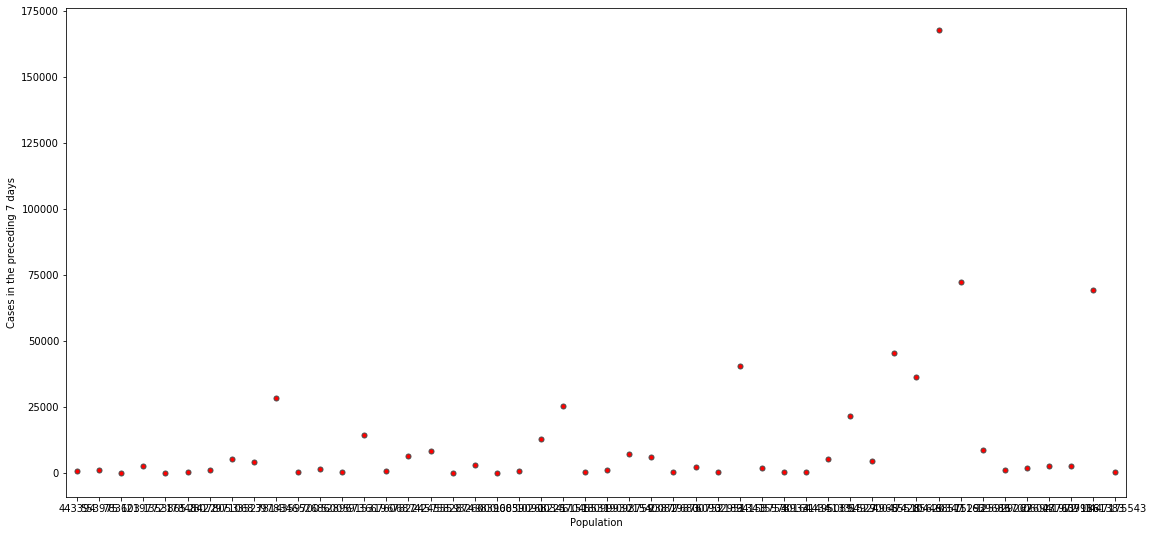

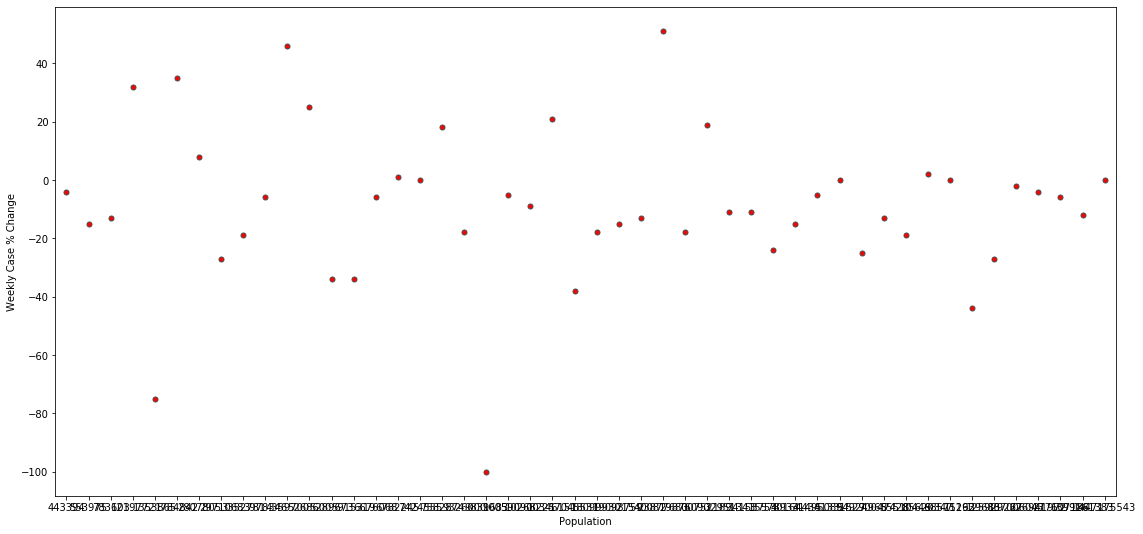

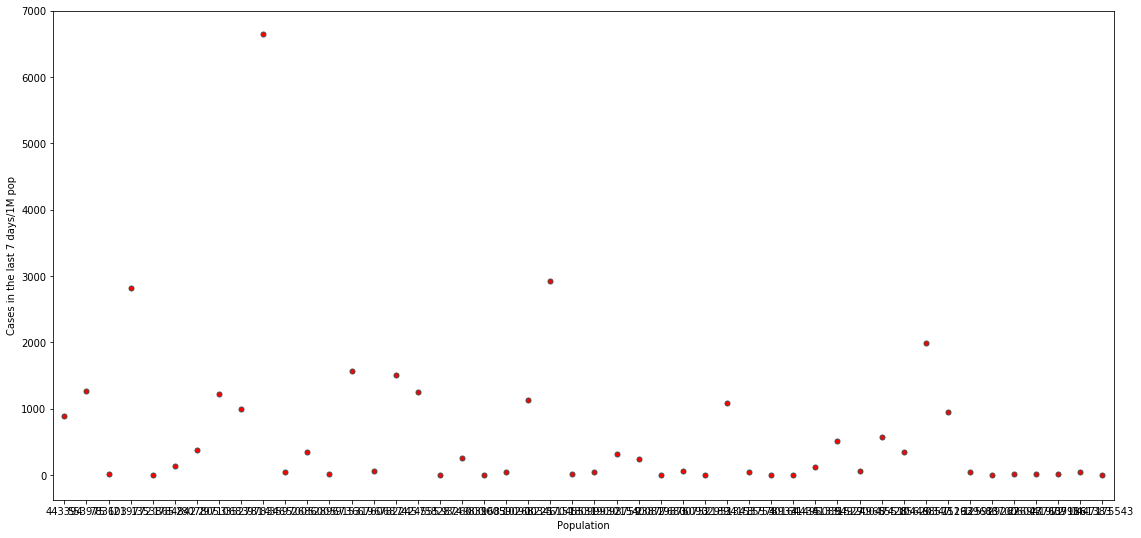

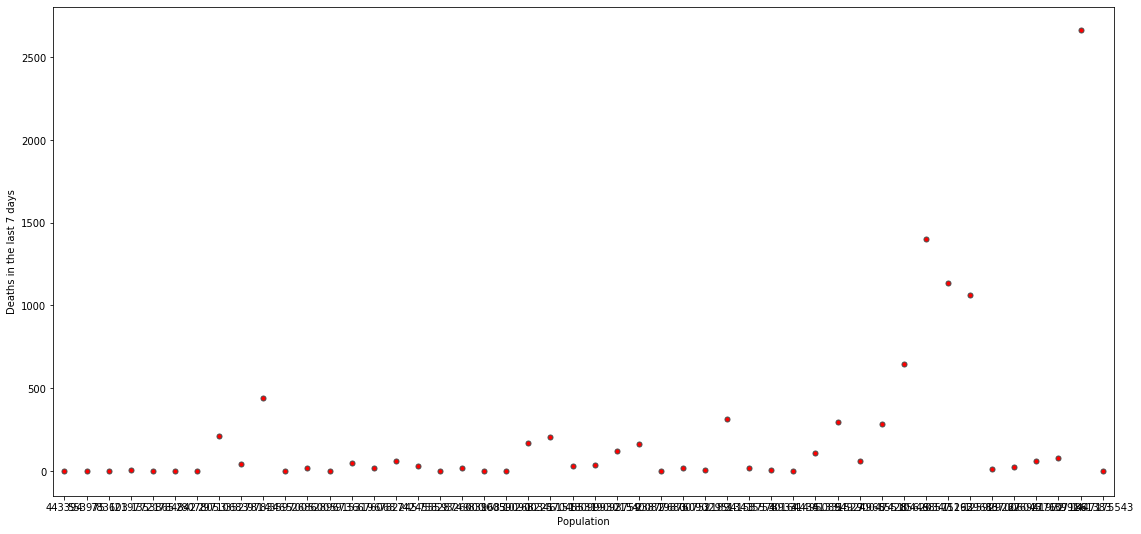

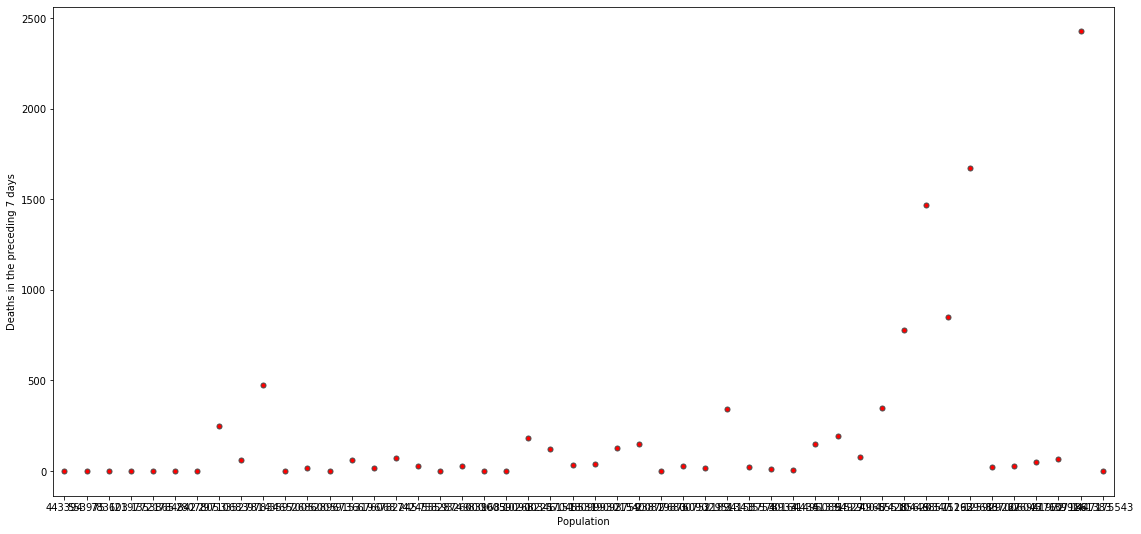

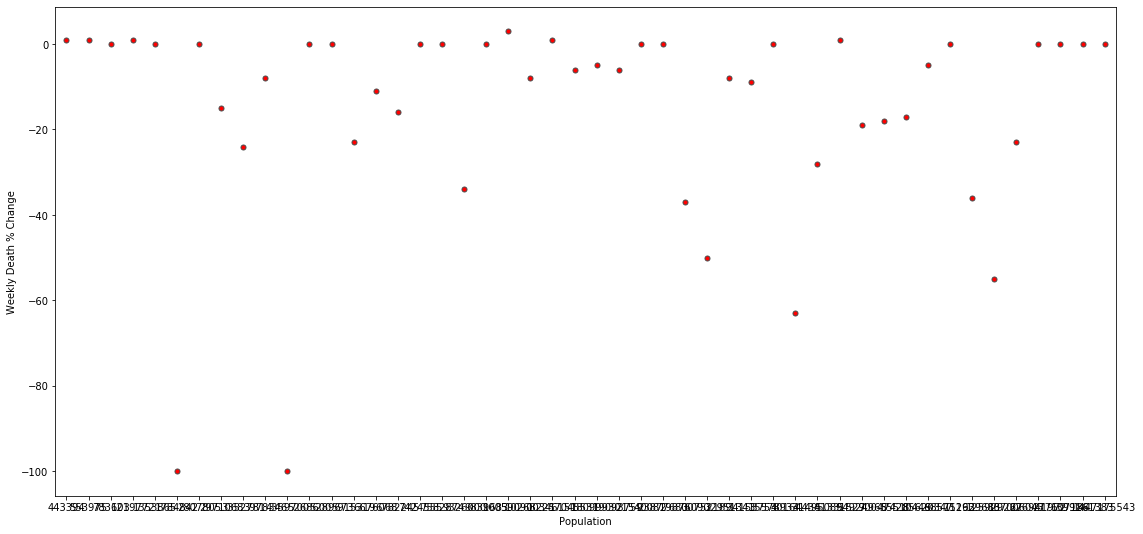

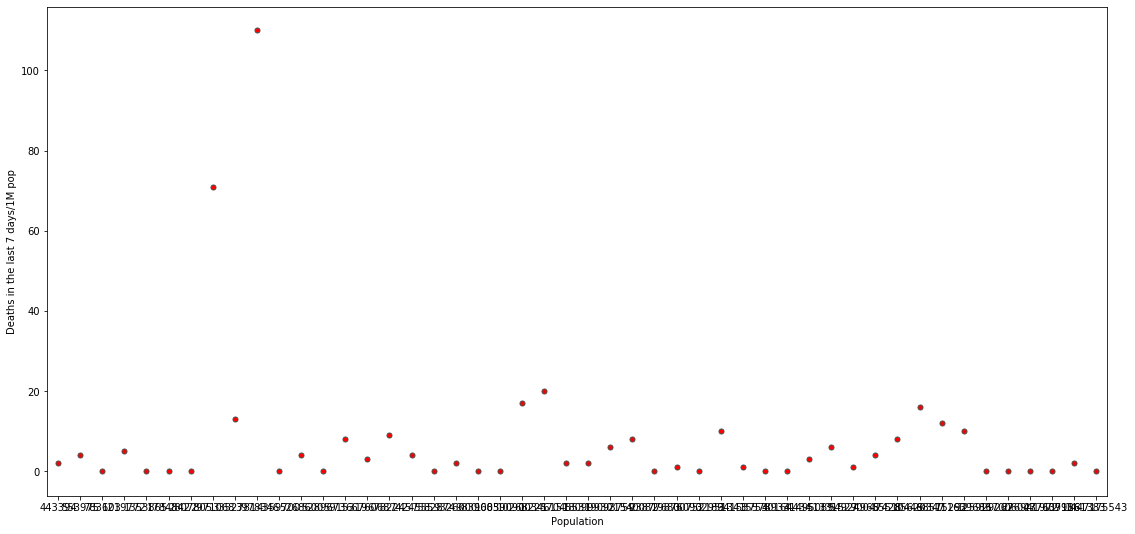

In [110]:
for i in ['Cases in the last 7 days',
       'Cases in the preceding 7 days', 'Weekly Case % Change',
       'Cases in the last 7 days/1M pop', 'Deaths in the last 7 days',
       'Deaths in the preceding 7 days', 'Weekly Death % Change',
       'Deaths in the last 7 days/1M pop']:
    plt.figure(figsize=(19,9))
    sns.swarmplot(x=df.Population,y=df[i],data=df,color='red',linewidth=1)
    
    plt.show()

In [112]:
df.columns

Index(['Country/Other', 'Cases in the last 7 days',
       'Cases in the preceding 7 days', 'Weekly Case % Change',
       'Cases in the last 7 days/1M pop', 'Deaths in the last 7 days',
       'Deaths in the preceding 7 days', 'Weekly Death % Change',
       'Deaths in the last 7 days/1M pop', 'Population'],
      dtype='object')

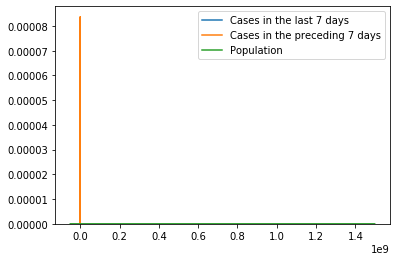

In [113]:
sns.kdeplot(df['Cases in the last 7 days'])
sns.kdeplot(df['Cases in the preceding 7 days'])
sns.kdeplot(df['Population'])

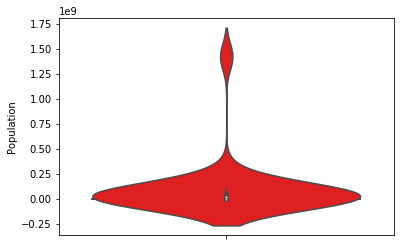

In [115]:
sns.violinplot(y="Cases in the last 7 days/1M pop",data=df)
sns.violinplot(y="Deaths in the last 7 days",data=df,color='orange')
sns.violinplot(y="Population",data=df,color='red')

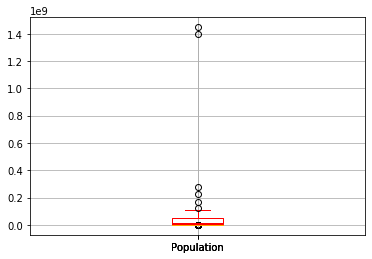

In [116]:
df.boxplot(column="Deaths in the preceding 7 days")
df.boxplot(column="Cases in the preceding 7 days",color='orange')
df.boxplot(column="Population",color='red')

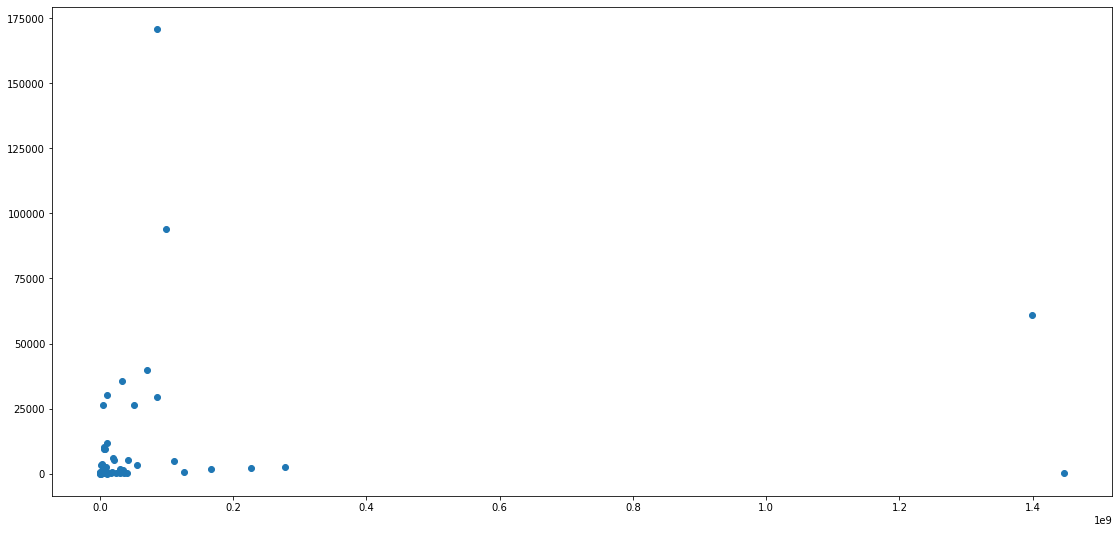

In [119]:
plt.figure(figsize=(19,9))
plt.scatter(x='Population',y='Cases in the last 7 days',data=df)

In [128]:
df.columns

Index(['Country/Other', 'Cases in the last 7 days',
       'Cases in the preceding 7 days', 'Weekly Case % Change',
       'Cases in the last 7 days/1M pop', 'Deaths in the last 7 days',
       'Deaths in the preceding 7 days', 'Weekly Death % Change',
       'Deaths in the last 7 days/1M pop', 'Population'],
      dtype='object')

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


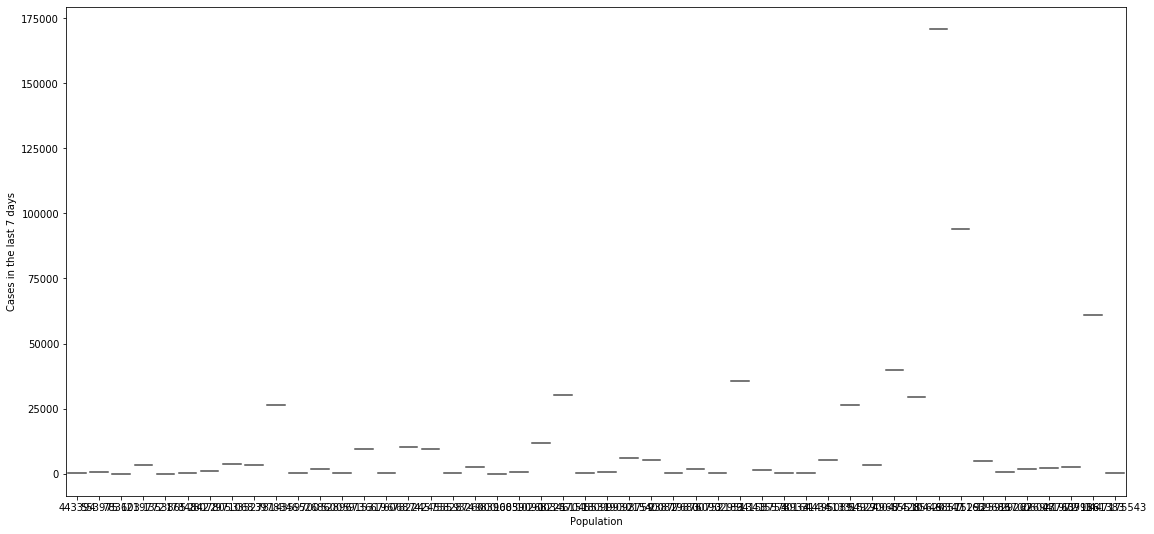

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


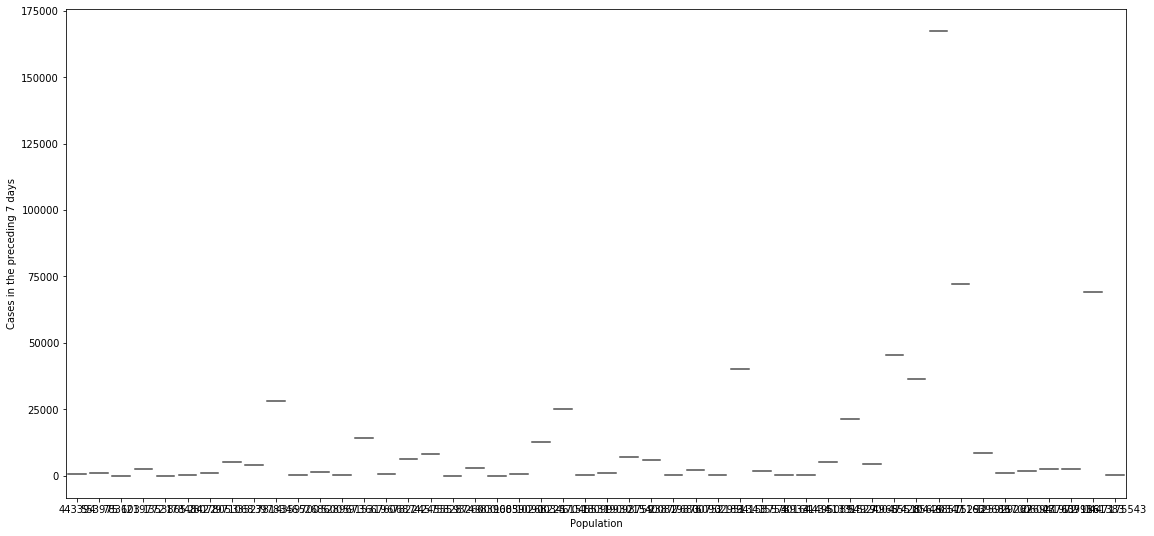

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


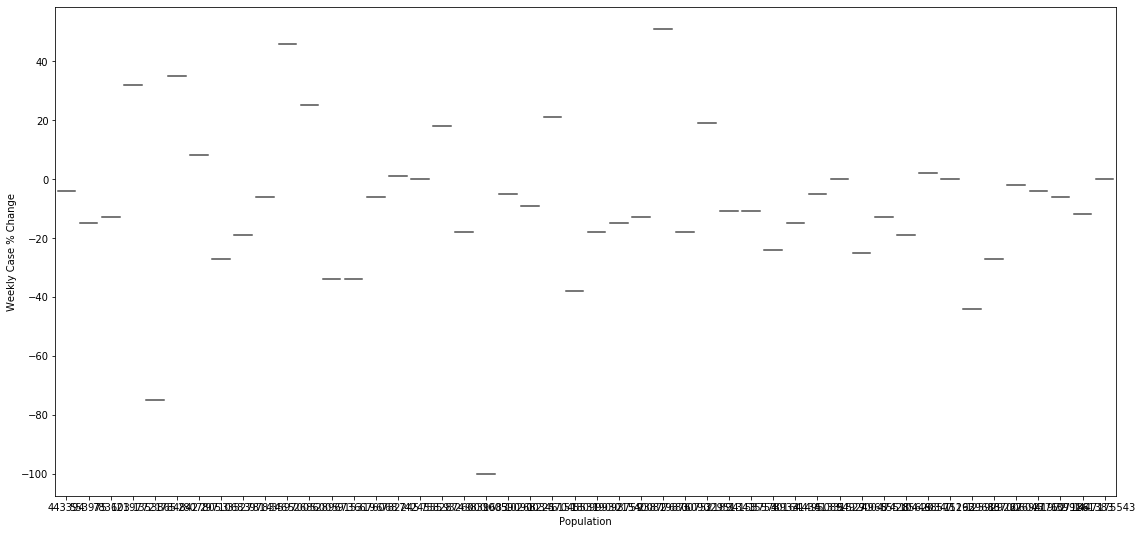

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


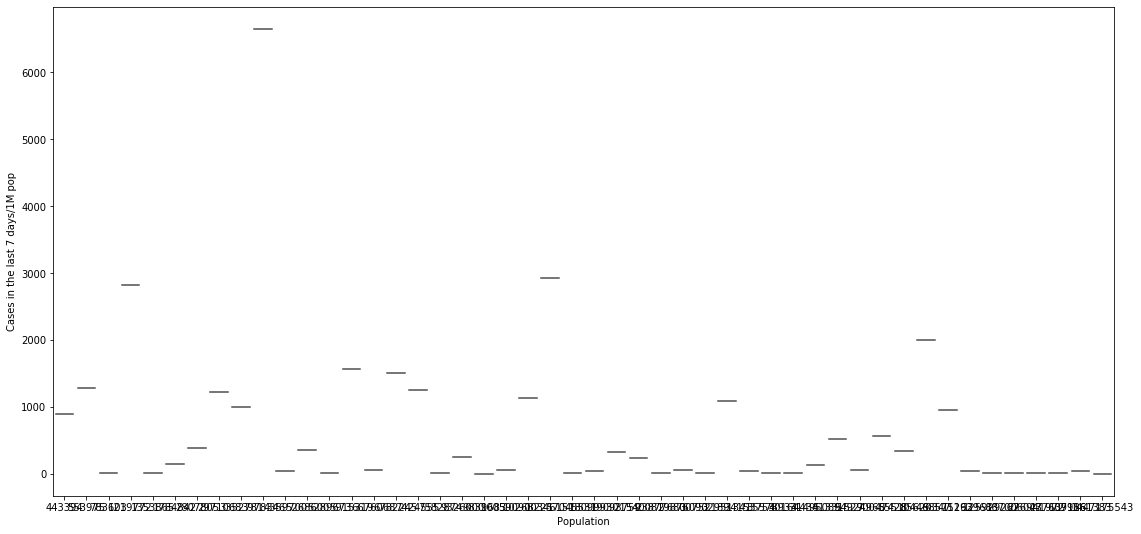

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


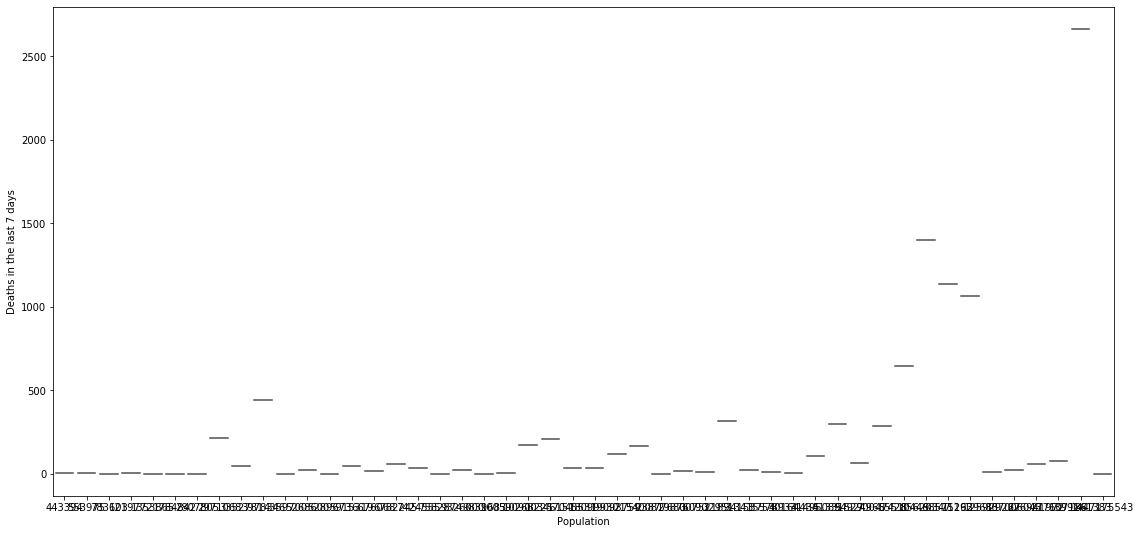

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


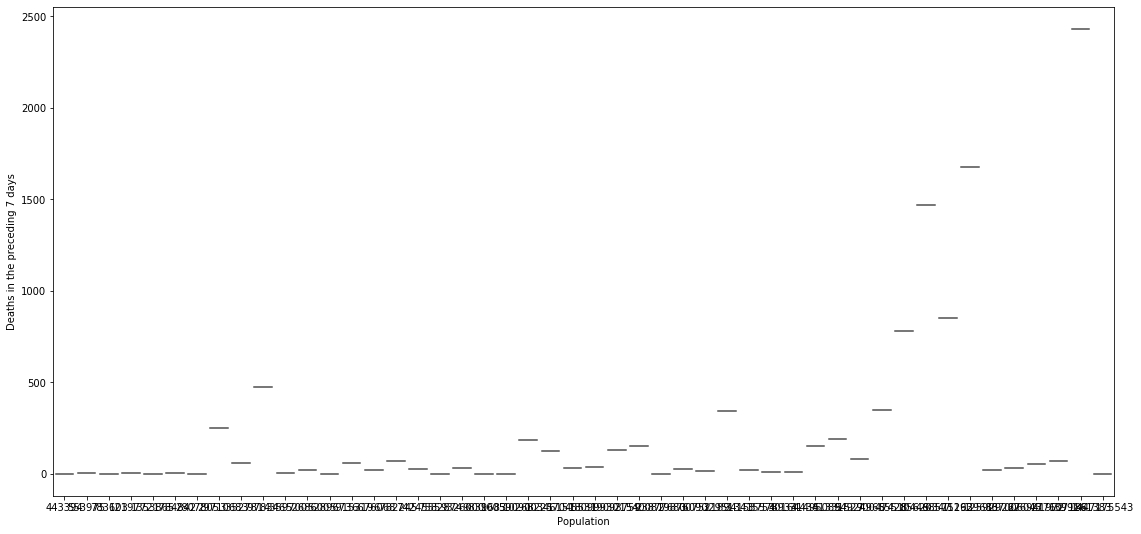

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


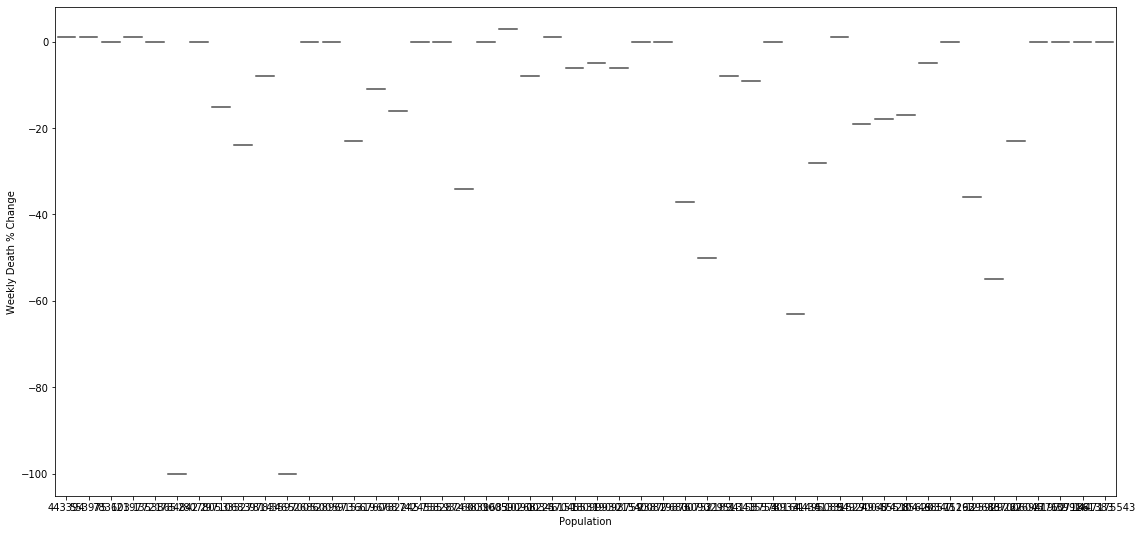

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


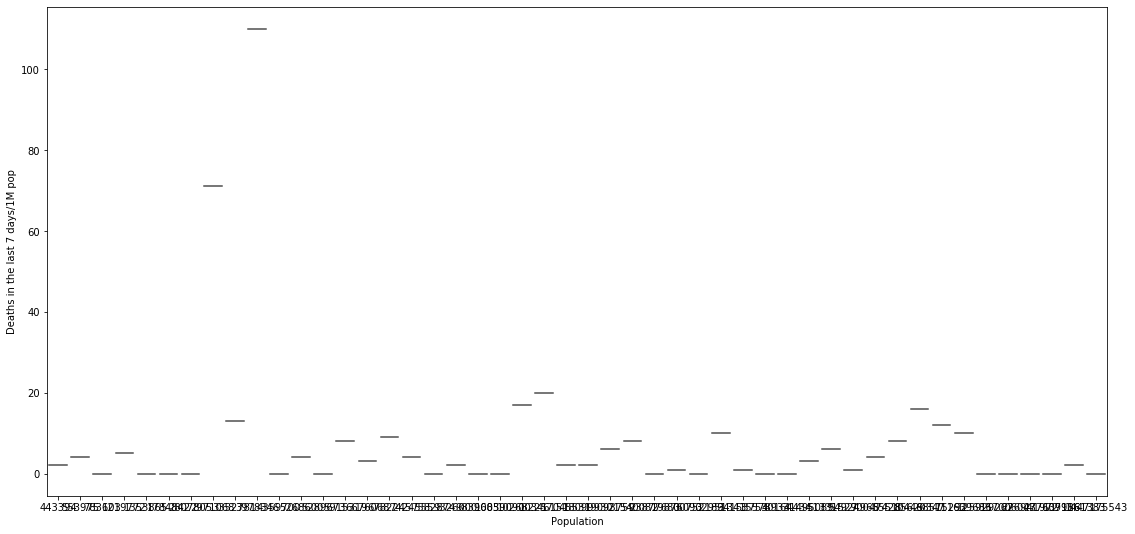

In [132]:
for i in ['Cases in the last 7 days',
       'Cases in the preceding 7 days', 'Weekly Case % Change',
       'Cases in the last 7 days/1M pop', 'Deaths in the last 7 days',
       'Deaths in the preceding 7 days', 'Weekly Death % Change',
       'Deaths in the last 7 days/1M pop']:
    plt.figure(figsize=(19,9))
    sns.lvplot(x=df.Population,y=df[i],data=df,color='red',linewidth=1)
    
    plt.show()

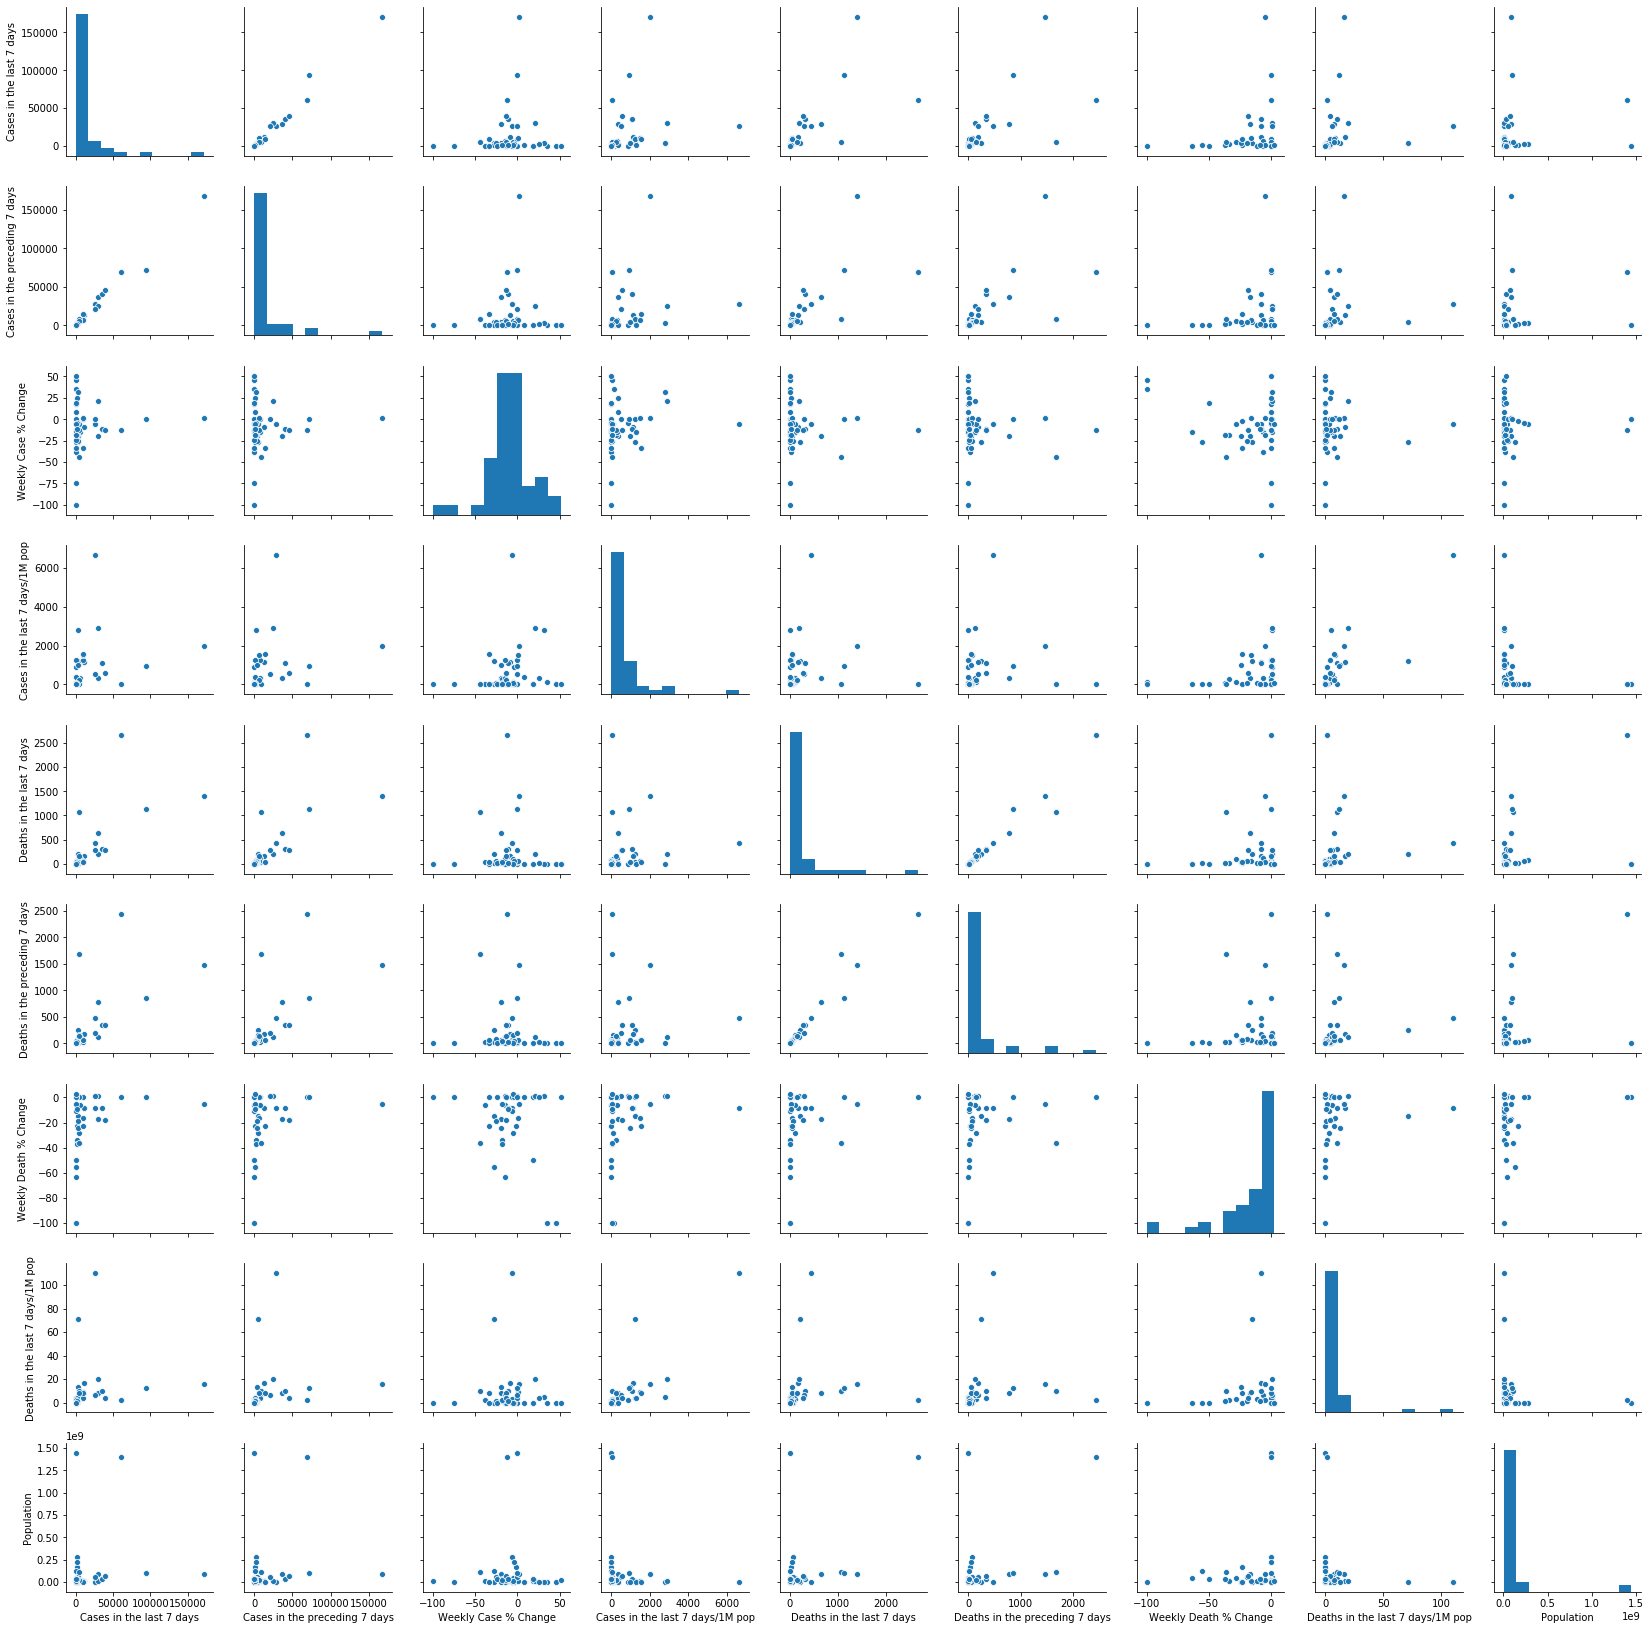

In [133]:
sns.pairplot(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002326EF20C48>,
      dtype=object)

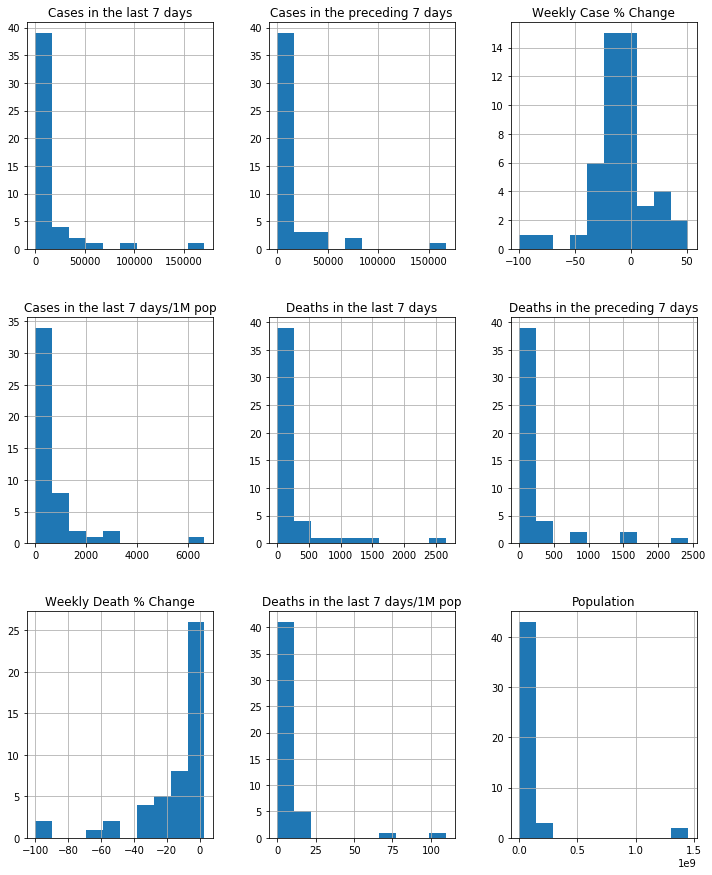

In [134]:
df.hist(figsize=(12,15))

In [135]:
import sweetviz as sv

In [136]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |                                             | [  0%]   00:00 ->…

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [137]:
from IPython.display import IFrame

In [138]:
IFrame(src='Analyze.html',width=1000,height=600)

In [145]:
df.columns

Index(['Country/Other', 'Cases in the last 7 days',
       'Cases in the preceding 7 days', 'Weekly Case % Change',
       'Cases in the last 7 days/1M pop', 'Deaths in the last 7 days',
       'Deaths in the preceding 7 days', 'Weekly Death % Change',
       'Deaths in the last 7 days/1M pop', 'Population'],
      dtype='object')

In [150]:
df2=pd.read_csv('file:///C:/Users/Md%20Asif%20Ikbal/Downloads/covid_asia_weekly_trend.csv')
df2.head()

,Country/Other,Cases in the last 7 days,Cases in the preceding 7 days,Weekly Case % Change,Cases in the last 7 days/1M pop,Deaths in the last 7 days,Deaths in the preceding 7 days,Weekly Death % Change,Deaths in the last 7 days/1M pop,Population
0,Afghanistan,288,339,-15,7,3,8,-63,0,40164434
1,Armenia,3640,4965,-27,1225,211,249,-15,71,2971068
2,Azerbaijan,11615,12763,-9,1131,170,184,-8,17,10268225
3,Bahrain,246,182,35,138,0,1,-100,0,1784842
4,Bangladesh,1648,1688,-2,10,23,30,-23,0,167006043


In [141]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [142]:
man=MinMaxScaler()
feat=[  'Cases in the last 7 days',
       'Cases in the preceding 7 days', 'Weekly Case % Change',
       'Cases in the last 7 days/1M pop', 'Deaths in the last 7 days',
       'Deaths in the preceding 7 days', 'Weekly Death % Change',
       'Deaths in the last 7 days/1M pop', 'Population']
df[feat]=man.fit_transform(df[feat])
df[feat]

,Cases in the last 7 days,Cases in the preceding 7 days,Weekly Case % Change,Cases in the last 7 days/1M pop,Deaths in the last 7 days,Deaths in the preceding 7 days,Weekly Death % Change,Deaths in the last 7 days/1M pop,Population
0,0.001684,0.002001,0.562914,0.001052,0.001127,0.003291,0.359223,0.000000,0.027456
1,0.021286,0.029626,0.483444,0.184183,0.079234,0.102427,0.825243,0.645455,0.001747
2,0.067921,0.076193,0.602649,0.170050,0.063838,0.075689,0.893204,0.154545,0.006791
3,0.001439,0.001063,0.894040,0.020749,0.000000,0.000411,0.000000,0.000000,0.000927
4,0.009637,0.010056,0.649007,0.001504,0.008637,0.012341,0.747573,0.000000,0.115130
5,0.000041,0.000024,0.576159,0.001353,0.000000,0.000000,0.970874,0.000000,0.000235
6,0.002292,0.002425,0.635762,0.132912,0.000376,0.000000,0.980583,0.018182,0.000000
7,0.001117,0.001809,0.410596,0.001654,0.011641,0.013575,0.912621,0.018182,0.011476
8,0.001094,0.001093,0.662252,0.000000,0.000000,0.000000,0.970874,0.000000,1.000000
9,0.020145,0.015526,0.874172,0.424598,0.002253,0.001234,0.980583,0.045455,0.000537


In [143]:
std=StandardScaler()
feat=[  'Cases in the last 7 days',
       'Cases in the preceding 7 days', 'Weekly Case % Change',
       'Cases in the last 7 days/1M pop', 'Deaths in the last 7 days',
       'Deaths in the preceding 7 days', 'Weekly Death % Change',
       'Deaths in the last 7 days/1M pop', 'Population']
df[feat]=std.fit_transform(df[feat])
df[feat]

,Cases in the last 7 days,Cases in the preceding 7 days,Weekly Case % Change,Cases in the last 7 days/1M pop,Deaths in the last 7 days,Deaths in the preceding 7 days,Weekly Death % Change,Deaths in the last 7 days/1M pop,Population
0,-0.425430,-0.440688,-0.234586,-0.544811,-0.430472,-0.433918,-2.025959,-0.411344,-0.201833
1,-0.310359,-0.276032,-0.695752,0.528870,0.013703,0.075993,-0.003511,3.439919,-0.333504
2,-0.036584,0.001528,-0.004003,0.446008,-0.073851,-0.061535,0.291429,0.510790,-0.307671
3,-0.426872,-0.446276,1.686938,-0.429333,-0.436878,-0.448728,-3.584929,-0.411344,-0.337703
4,-0.378743,-0.392672,0.265010,-0.542166,-0.387763,-0.387370,-0.340586,-0.411344,0.247207
5,-0.435077,-0.452469,-0.157725,-0.543048,-0.436878,-0.450844,0.628504,-0.411344,-0.341248
6,-0.421860,-0.438161,0.188149,0.228275,-0.434743,-0.450844,0.670638,-0.302858,-0.342452
7,-0.428760,-0.441827,-1.118487,-0.541285,-0.370679,-0.381022,0.375698,-0.302858,-0.283678
8,-0.428897,-0.446098,0.341871,-0.550981,-0.436878,-0.450844,0.628504,-0.411344,4.779219
9,-0.317053,-0.360068,1.571646,1.938407,-0.424066,-0.444497,0.670638,-0.140128,-0.339704
